<a href="https://colab.research.google.com/github/SagarRathod07/playstore-apps-data-analysis/blob/main/Final_Submission_of_EDA_Capstone_Play_Store_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Play Store App Review Analysis**



##### **Project Type**    - EDA
##### **Contribution**    - Team
##### **Team Member 1 -** Avik Ghosh
##### **Team Member 2 -** Sagar Rathod


# **Project Summary -**

With the help of Python, we will perform an Exploratory Data Analysis on data from Google Play Store.

Google Play Store through the utilization of the ever-increasing reach of the internet and accessibility through smartphones has created a lucrative market for apps on a global scale. The wide range of functionalities and ease of developing basic use applications promotes a competitive market space where developers launch, update and modify their applications based on user experience and valuable feedback. Many applications do not survive and are taken down. At the end of Q’4 of 2021, the number of apps available in the Google Play Store was 4.67 million which fell to 3.29 million in Q’1 of 2022 and has steadily increased to 3.55 million by Q’4 of 2022. It is thus crucial to quantify the parameters to understand the performance of an app.


Here, we will look at a subset of the whole Google Play Store, approximately ten thousand apps across different categories and perform a comprehensive analysis to look for insights and understand the driving forces for growth and retention.

The data consists of the following two files: -
* Playstore Data.csv : Contains 13 features to define an individual app.
* User Reviews.csv: Contains 100 reviews for each app, most helpful first. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.


# **GitHub Link -**

https://github.com/Avik-G/EDA-Play-Store-Review-Analysis-

# **Problem Statement**


Play Store Data
* What is the correlation between different features?
* What is the distribution of Ratings?
* What is the average rating of Apps?
* What is the relationship between all features in the dataframe?
* How does Size of an App effect its Rating?
* How does Size of an App effect its Rating in each category?
* How does Price of an App effect its Rating?
* Which categories have large sized apps?
* What are the top content rating values?
* What are the Top Categories on Play Store?
* How does count of apps vary by category?
* Which category has maximum number of Installs?
* What are the top 10 genres with maximum number of Apps?
* Which Apps have maximum reviews?
* What are the top 10 Apps in any category?
* What is the Ratio of Free to Paid Apps?
* What are the top 10 Free Apps?
* In which categories do the top 20 free apps belong to?
* What is the case for Paid Apps?
* What are the top 10 Paid Apps?
* In which categories do the top 10 paid apps belong to?
* What are the Top Apps based on Revenue generated?
* What is the App pricing trend across popular categories?
* What is the Rating difference between Paid and Free Apps?

User Review Data

* What is the percentage distribution of Review Sentiments?
* What are the top 10 Positively reviewed Apps?
* What are the top 10 Negatively reviewed Apps?
* What are the top 10 Neutrally reviewed Apps?
* How is the Sentiment Subjectivity distributed?
* Is Sentiment Subjectivity proportional to Sentiment Polarity?

Merged Data

* Fraction of Sentiment Polarity based on Category
* How does Sentiment Polarity change based on Free v/s Paid Apps?
* What is the correlation between features of the merged dataframe?


#### **Define Your Business Objective?**

The Business Objective is to develop an understanding on what the types of apps that perform well in this highly competitive playstore enviornment.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
path = "/content/drive/MyDrive/DS/EDA/Data/"

Play_Store_df = pd.read_csv(path + 'Copy of Play Store Data.csv')
User_Review_df = pd.read_csv(path + 'Copy of User Reviews.csv')

### Dataset First View

In [ ]:
# Dataset First Look
# Play Store Data
Play_Store_df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [ ]:
# User Review Data
User_Review_df.head()

App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
2       NaN                 NaN                     NaN  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
# Play Store Data
Play_Store_df.shape

(10841, 13)

In [ ]:
# Dataset Rows & Columns count
# User Review Data
User_Review_df.shape

(64295, 5)

### Dataset Information

In [ ]:
# Dataset Info
# Play Store Data
Play_Store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
# Dataset Info
# User Review Data
User_Review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
# For the Play Store Dataset we need to check for Duplicate Values in the 'App' Column
# For the User Review Dataset there is no scope to check for Duplicate Values as each App has multiple reviews
Play_Store_df['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9660, dtype: int64

In [ ]:
# Check one of the Outputs
Play_Store_df[Play_Store_df['App']== 'ESPN']

App Category  Rating Reviews                Size     Installs  Type  \
2959  ESPN   SPORTS     4.2  521138  Varies with device  10,000,000+  Free   
3010  ESPN   SPORTS     4.2  521138  Varies with device  10,000,000+  Free   
3018  ESPN   SPORTS     4.2  521138  Varies with device  10,000,000+  Free   
3048  ESPN   SPORTS     4.2  521140  Varies with device  10,000,000+  Free   
3060  ESPN   SPORTS     4.2  521140  Varies with device  10,000,000+  Free   
3072  ESPN   SPORTS     4.2  521140  Varies with device  10,000,000+  Free   
4069  ESPN   SPORTS     4.2  521081  Varies with device  10,000,000+  Free   

     Price Content Rating  Genres   Last Updated         Current Ver  \
2959     0   Everyone 10+  Sports  July 19, 2018  Varies with device   
3010     0   Everyone 10+  Sports  July 19, 2018  Varies with device   
3018     0   Everyone 10+  Sports  July 19, 2018  Varies with device   
3048     0   Everyone 10+  Sports  July 19, 2018  Varies with device   
3060     0   Everyone 10+  Sports  July 19, 2018  Varies with device   
3072     0   Everyone 10+  Sports  July 19, 2018  Varies with device   
4069     0   Everyone 10+  Sports  July 19, 2018  Varies with device   

     Android Ver  
2959  5.0 and up  
3010  5.0 and up  
3018  5.0 and up  
3048  5.0 and up  
3060  5.0 and up  
3072  5.0 and up  
4069  5.0 and up

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
# Creating a function to show all missing/null values
def playstoreinfo():
  temp=pd.DataFrame(index = Play_Store_df.columns)
  temp["datatype"] = Play_Store_df.dtypes
  temp["not null values"] = Play_Store_df.count()
  temp["null value"] = Play_Store_df.isnull().sum()
  temp["% of the null value"] = Play_Store_df.isnull().mean()
  temp["unique count"] = Play_Store_df.nunique()
  return temp
playstoreinfo()

datatype  not null values  null value  % of the null value  \
App              object            10841           0             0.000000   
Category         object            10841           0             0.000000   
Rating          float64             9367        1474             0.135965   
Reviews          object            10841           0             0.000000   
Size             object            10841           0             0.000000   
Installs         object            10841           0             0.000000   
Type             object            10840           1             0.000092   
Price            object            10841           0             0.000000   
Content Rating   object            10840           1             0.000092   
Genres           object            10841           0             0.000000   
Last Updated     object            10841           0             0.000000   
Current Ver      object            10833           8             0.000738   
Android Ver      object            10838           3             0.000277   

                unique count  
App                     9660  
Category                  34  
Rating                    40  
Reviews                 6002  
Size                     462  
Installs                  22  
Type                       3  
Price                     93  
Content Rating             6  
Genres                   120  
Last Updated            1378  
Current Ver             2832  
Android Ver               33

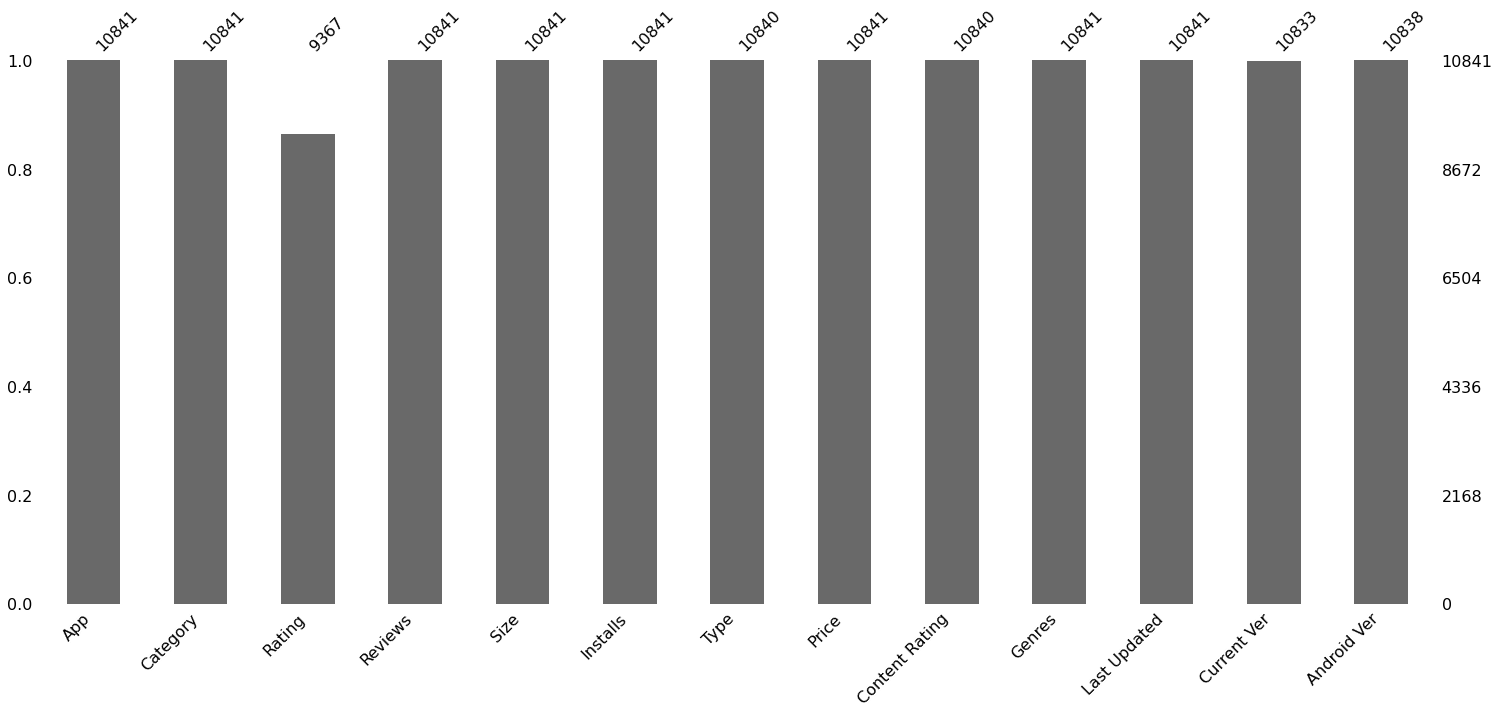

In [ ]:
# Visualizing the missing values
msno.bar(Play_Store_df)

### What did you know about your dataset?

* It is observed that some Apps like ESPN, ROBLOX, Candy Crush Saga, etc have multiple entries with subsequent same data in all rows.These duplicated need to be removed
* The columns of Rating, Type, Content Rating, Current Ver and Android Ver have Null Values out of which only the Rating Null Values are a significant portion of the Data Set. Thus we can drop the null values rows from all columns except Rating

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
list(Play_Store_df.columns.values)

['App',
 'Category',
 'Rating',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver']

In [ ]:
# Dataset Describe
Play_Store_df.describe()

Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000

### Variables Description 

The Play Store[Play_Store_df] dataframe has 10841 rows and 13 columns. The 13 columns are identified as below:

- App - It tells us about the name of the application with a short description (optional).
- Category - It gives the category to the app.
- Rating - It contains the average rating the respective app received from its users.
- Reviews - It tells us about the total number of users who have given a review for the application.
- Size - It tells us about the size being occupied the application on the mobile phone.
- Installs - It tells us about the total number of installs/downloads for an application.
- Type - IIt states whether an app is free to use or paid.
- Price - It gives the price payable to install the app. For free type apps, the price is zero.
- Content Rating - It states whether or not an app is suitable for all age groups or not.
- Genres - It tells us about the various other categories to which an application can belong.
- Last Updated - It tells us about the when the application was updated.
- Current Ver - It tells us about the current version of the application.
- Android Ver - It tells us about the android version which can support the application on its platform.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
U_App = Play_Store_df['App'].unique()
U_Category = Play_Store_df['Category'].unique()
U_Rating = Play_Store_df['Rating'].unique()
U_Reviews = Play_Store_df['Reviews'].unique()
U_Size = Play_Store_df['Size'].unique()
U_Installs = Play_Store_df['Installs'].unique()
U_Type = Play_Store_df['Type'].unique()
U_Price = Play_Store_df['Price'].unique()
U_Content_Rating = Play_Store_df['Content Rating'].unique()
U_Genres = Play_Store_df['Genres'].unique()
U_Last_Updated = Play_Store_df['Last Updated'].unique()
U_Current_Ver = Play_Store_df['Current Ver'].unique()
U_Andriod_Ver = Play_Store_df['Android Ver'].unique()

In [ ]:
print(list(U_App))
print(list(U_Category))
print(list(U_Rating))
print(list(U_Reviews))
print(list(U_Size))
print(list(U_Installs))
print(list(U_Type))
print(list(U_Price))
print(list(U_Content_Rating))
print(list(U_Genres))
print(list(U_Last_Updated))
print(list(U_Current_Ver))
print(list(U_Andriod_Ver))

['Photo Editor & Candy Camera & Grid & ScrapBook', 'Coloring book moana', 'U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'Sketch - Draw & Paint', 'Pixel Draw - Number Art Coloring Book', 'Paper flowers instructions', 'Smoke Effect Photo Maker - Smoke Editor', 'Infinite Painter', 'Garden Coloring Book', 'Kids Paint Free - Drawing Fun', 'Text on Photo - Fonteee', 'Name Art Photo Editor - Focus n Filters', 'Tattoo Name On My Photo Editor', 'Mandala Coloring Book', '3D Color Pixel by Number - Sandbox Art Coloring', 'Learn To Draw Kawaii Characters', 'Photo Designer - Write your name with shapes', '350 Diy Room Decor Ideas', 'FlipaClip - Cartoon animation', 'ibis Paint X', 'Logo Maker - Small Business', "Boys Photo Editor - Six Pack & Men's Suit", 'Superheroes Wallpapers | 4K Backgrounds', 'Mcqueen Coloring pages', 'HD Mickey Minnie Wallpapers', 'Harley Quinn wallpapers HD', 'Colorfit - Drawing & Coloring', 'Animated Photo Editor', 'Pencil Sketch Drawing', 'Easy Realistic Drawing Tut

## 3. Data Wrangling

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

In [ ]:
# Remooving Duplicate Values
Play_Store_df.drop_duplicates(subset= 'App', inplace = True)

# Check Dataset
Play_Store_df['App'].value_counts()

Photo Editor & Candy Camera & Grid & ScrapBook    1
CK Pharmacies                                     1
CK Call NEW                                       1
Ck Coif                                           1
CONTRACT KILLER: ZOMBIES                          1
                                                 ..
Bike Race Free - Top Motorcycle Racing Games      1
Dance School Stories - Dance Dreams Come True     1
3D Bowling                                        1
Mind Games Pro                                    1
iHoroscope - 2018 Daily Horoscope & Astrology     1
Name: App, Length: 9660, dtype: int64

In [ ]:
# Handling Missing/Null Values

# Dropping Null Values from Type, Content Rating, Current Ver and Android Ver Columns 
Play_Store_df = Play_Store_df[Play_Store_df['Android Ver'].notna()]
Play_Store_df = Play_Store_df[Play_Store_df['Content Rating'].notna()]
Play_Store_df = Play_Store_df[Play_Store_df['Current Ver'].notna()]
Play_Store_df = Play_Store_df[Play_Store_df['Type'].notna()]

In [ ]:
# Check Rating Column for Outliers
Play_Store_df[Play_Store_df.Rating>5]

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []

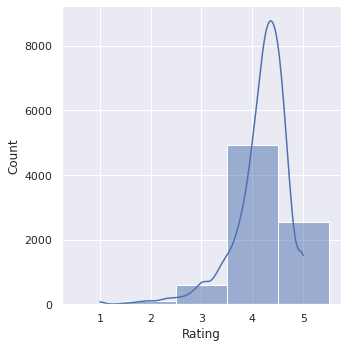

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


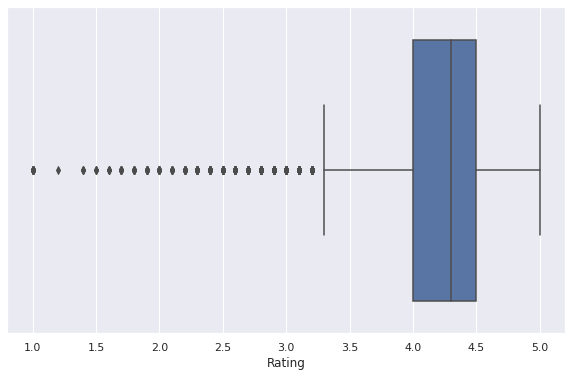

In [ ]:
# Distribution of Data in Rating Column
Review_data = Play_Store_df["Rating"]
sns.set(rc = {'figure.figsize':(12,7)})
sns.displot(Review_data, discrete = True, kde = True)
plt.show()

# Box Plot of Data in Rating Column
fig, ax = plt.subplots(figsize = (10,6))
sns.boxplot(Review_data)

In [ ]:
# Skewness of Rating Data
Play_Store_df['Rating'].skew()

-1.7443331394643597

In [ ]:
# Finding Meadian & Mode Values of Rating Column
Play_Store_df_rating_median = Play_Store_df["Rating"].median()
print('Median Value of Rating Data: ' ,Play_Store_df_rating_median)
Play_Store_df_rating_mode = Play_Store_df["Rating"].mode()
print('Mode Value of Rating Data: ', Play_Store_df_rating_mode)

Median Value of Rating Data:  4.3
Mode Value of Rating Data:  0    4.3
dtype: float64


In [ ]:
# Replace Null Values with Median
Play_Store_df["Rating"].fillna(value = Play_Store_df_rating_median, inplace = True)

# Check Dataset
playstoreinfo()

datatype  not null values  null value  % of the null value  \
App              object             9648           0                  0.0   
Category         object             9648           0                  0.0   
Rating          float64             9648           0                  0.0   
Reviews          object             9648           0                  0.0   
Size             object             9648           0                  0.0   
Installs         object             9648           0                  0.0   
Type             object             9648           0                  0.0   
Price            object             9648           0                  0.0   
Content Rating   object             9648           0                  0.0   
Genres           object             9648           0                  0.0   
Last Updated     object             9648           0                  0.0   
Current Ver      object             9648           0                  0.0   
Android Ver      object             9648           0                  0.0   

                unique count  
App                     9648  
Category                  33  
Rating                    39  
Reviews                 5328  
Size                     457  
Installs                  20  
Type                       2  
Price                     92  
Content Rating             6  
Genres                   118  
Last Updated            1376  
Current Ver             2817  
Android Ver               33

In [ ]:
# Changing Price Column datatype from Object to Float.
# In attempts to change the dtype directly, a '$' string has restricted from using astype functions to change the dtype. 

# Creating a function called "dollar to float" to complete the process
def dollar_to_float(p):
  if '$' in p:
    return float(p[1:])
  else:
    return float(p)

# Apply "dollar to float"
Play_Store_df['Price'] = Play_Store_df['Price'].apply(lambda x: dollar_to_float(x))

In [ ]:
#Convert Reviews Column datatype from Object to Integer
Play_Store_df['Reviews'] = Play_Store_df['Reviews'].astype(int)

In [ ]:
# Convert Installs Column datatype from Object to Integer

# Creating a function called "remove and convert" to complete the process
def remove_and_convert(I):
  if '+' and ',' in I:
    new_value = int(I[:-1].replace(',',''))
    return new_value
  elif '+' in I:
    new_val = int(I[:-1])
    return new_val
  else:
    return int(I)

# Apply "remove and convert"
Play_Store_df['Installs'] = Play_Store_df['Installs'].apply(lambda x: remove_and_convert(x))

In [ ]:
# Convert Size Column datatype from Object to Float. [1 MB has 1024 KB thus 1 KB =1/1024 MB]

# Creating a function called "KB to MB converter" to complete the process
def KB_to_MB_converter(S):
  try:
    if 'M' in S:
      return float(S[:-1])
    elif 'k' in S:
      return round(float(S[:-1])/1024, 4)
    else:
      return S
  except:
    return S

# Apply "KB to MB converter"
Play_Store_df['Size'] = Play_Store_df['Size'].apply(lambda x: KB_to_MB_converter(x))

# There is a possibility of existence of string objects in the Column data other than 'M' or 'k'. 
# The strings 'Varies with device' is replaced with 'NaN' and the column is converted to a float.

Play_Store_df['Size'] = Play_Store_df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
Play_Store_df['Size'] = Play_Store_df['Size'].apply(lambda x: float(x))

In [ ]:
# Check for Null Values in Size Column
playstoreinfo()

datatype  not null values  null value  % of the null value  \
App              object             9648           0             0.000000   
Category         object             9648           0             0.000000   
Rating          float64             9648           0             0.000000   
Reviews           int64             9648           0             0.000000   
Size            float64             8422        1226             0.127073   
Installs          int64             9648           0             0.000000   
Type             object             9648           0             0.000000   
Price           float64             9648           0             0.000000   
Content Rating   object             9648           0             0.000000   
Genres           object             9648           0             0.000000   
Last Updated     object             9648           0             0.000000   
Current Ver      object             9648           0             0.000000   
Android Ver      object             9648           0             0.000000   

                unique count  
App                     9648  
Category                  33  
Rating                    39  
Reviews                 5328  
Size                     455  
Installs                  20  
Type                       2  
Price                     92  
Content Rating             6  
Genres                   118  
Last Updated            1376  
Current Ver             2817  
Android Ver               33

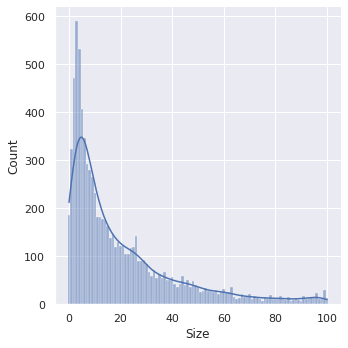

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


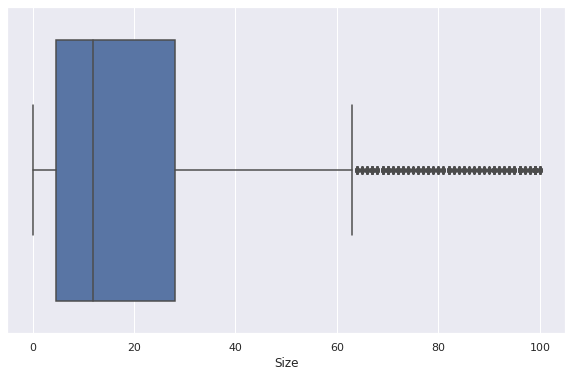

In [ ]:
# Distribution of Size Data
Size_data = Play_Store_df["Size"]
sns.set(rc = {'figure.figsize':(20,10)})
sns.displot(Size_data, discrete = True, kde = True)
plt.show()


# Box Plot of Size Data
fig, ax = plt.subplots(figsize = (10,6))
sns.boxplot(Size_data)

In [ ]:
# Skew of Size Data
Play_Store_df['Size'].skew()

# Finding Meadian & Mode Values of Size Column and Replacing with Median
Play_Store_df_Size_median = Play_Store_df["Size"].median()
print('Median Value of Size Data: ' ,Play_Store_df_Size_median)
Play_Store_df_Size_mode = Play_Store_df["Size"].mode()
print('Mode Value of Size Data: ', Play_Store_df_Size_mode)

Play_Store_df["Size"].fillna(value = Play_Store_df_Size_median, inplace = True)

Median Value of Size Data:  12.0
Mode Value of Size Data:  0    11.0
1    12.0
dtype: float64


In [ ]:
playstoreinfo()

datatype  not null values  null value  % of the null value  \
App              object             9648           0                  0.0   
Category         object             9648           0                  0.0   
Rating          float64             9648           0                  0.0   
Reviews           int64             9648           0                  0.0   
Size            float64             9648           0                  0.0   
Installs          int64             9648           0                  0.0   
Type             object             9648           0                  0.0   
Price           float64             9648           0                  0.0   
Content Rating   object             9648           0                  0.0   
Genres           object             9648           0                  0.0   
Last Updated     object             9648           0                  0.0   
Current Ver      object             9648           0                  0.0   
Android Ver      object             9648           0                  0.0   

                unique count  
App                     9648  
Category                  33  
Rating                    39  
Reviews                 5328  
Size                     455  
Installs                  20  
Type                       2  
Price                     92  
Content Rating             6  
Genres                   118  
Last Updated            1376  
Current Ver             2817  
Android Ver               33

In [ ]:
# Converting Last Update to DateTime Format
Play_Store_df["Last Update"]=pd.to_datetime(Play_Store_df['Last Updated']) 

In [ ]:
# Check for all conversions
Play_Store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9648 non-null   object        
 1   Category        9648 non-null   object        
 2   Rating          9648 non-null   float64       
 3   Reviews         9648 non-null   int64         
 4   Size            9648 non-null   float64       
 5   Installs        9648 non-null   int64         
 6   Type            9648 non-null   object        
 7   Price           9648 non-null   float64       
 8   Content Rating  9648 non-null   object        
 9   Genres          9648 non-null   object        
 10  Last Updated    9648 non-null   object        
 11  Current Ver     9648 non-null   object        
 12  Android Ver     9648 non-null   object        
 13  Last Update     9648 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(8)
m

In [ ]:
# Merging Play Store and User Review Datasets

# Merging Both Dataframes on APP Column
merged_df = Play_Store_df.merge(User_Review_df, on = "App")
merged_df.head()


App        Category  Rating  Reviews  Size  Installs  Type  \
0  Coloring book moana  ART_AND_DESIGN     3.9      967  14.0    500000  Free   
1  Coloring book moana  ART_AND_DESIGN     3.9      967  14.0    500000  Free   
2  Coloring book moana  ART_AND_DESIGN     3.9      967  14.0    500000  Free   
3  Coloring book moana  ART_AND_DESIGN     3.9      967  14.0    500000  Free   
4  Coloring book moana  ART_AND_DESIGN     3.9      967  14.0    500000  Free   

   Price Content Rating                     Genres      Last Updated  \
0    0.0       Everyone  Art & Design;Pretend Play  January 15, 2018   
1    0.0       Everyone  Art & Design;Pretend Play  January 15, 2018   
2    0.0       Everyone  Art & Design;Pretend Play  January 15, 2018   
3    0.0       Everyone  Art & Design;Pretend Play  January 15, 2018   
4    0.0       Everyone  Art & Design;Pretend Play  January 15, 2018   

  Current Ver   Android Ver Last Update  \
0       2.0.0  4.0.3 and up  2018-01-15   
1       2.0.0  4.0.3 and up  2018-01-15   
2       2.0.0  4.0.3 and up  2018-01-15   
3       2.0.0  4.0.3 and up  2018-01-15   
4       2.0.0  4.0.3 and up  2018-01-15   

                                   Translated_Review Sentiment  \
0  A kid's excessive ads. The types ads allowed a...  Negative   
1                                         It bad >:(  Negative   
2                                               like   Neutral   
3                                                NaN       NaN   
4                           I love colors inspyering  Positive   

   Sentiment_Polarity  Sentiment_Subjectivity  
0              -0.250                1.000000  
1              -0.725                0.833333  
2               0.000                0.000000  
3                 NaN                     NaN  
4               0.500                0.600000

In [ ]:
merged_df = merged_df.dropna(subset=['Translated_Review'])

In [ ]:
# Distribution of postive, neg reviews in each category
sentiment_count = merged_df.groupby(["Category","Sentiment"]).agg({'App': 'count'}).reset_index()
sentiment_sum =  merged_df.groupby(['Category']).agg({'Sentiment': 'count'}).reset_index()
print(sentiment_sum.head())
print(sentiment_count.head())

              Category  Sentiment
0       ART_AND_DESIGN        382
1    AUTO_AND_VEHICLES        289
2               BEAUTY        338
3  BOOKS_AND_REFERENCE        651
4             BUSINESS       1082
            Category Sentiment  App
0     ART_AND_DESIGN  Negative   61
1     ART_AND_DESIGN   Neutral   62
2     ART_AND_DESIGN  Positive  259
3  AUTO_AND_VEHICLES  Negative   17
4  AUTO_AND_VEHICLES   Neutral   36


In [ ]:
# Normalizing it before plotting
new_df = sentiment_count.merge(sentiment_sum, on = "Category")
new_df["normalized_sentiment_counts"] = new_df["App"]/new_df["Sentiment_y"]
new_df.head()

Category Sentiment_x  App  Sentiment_y  \
0     ART_AND_DESIGN    Negative   61          382   
1     ART_AND_DESIGN     Neutral   62          382   
2     ART_AND_DESIGN    Positive  259          382   
3  AUTO_AND_VEHICLES    Negative   17          289   
4  AUTO_AND_VEHICLES     Neutral   36          289   

   normalized_sentiment_counts  
0                     0.159686  
1                     0.162304  
2                     0.678010  
3                     0.058824  
4                     0.124567

In [ ]:
sentiment_count_2 = merged_df.groupby(["Category","Sentiment","Installs"]).agg({'App': 'count'}).reset_index()
sentiment_sum_2 =  merged_df.groupby(['Category']).agg({'Sentiment': 'count'}).reset_index()
sentiment_count_2.head()

Category Sentiment  Installs  App
0  ART_AND_DESIGN  Negative    100000   23
1  ART_AND_DESIGN  Negative    500000   22
2  ART_AND_DESIGN  Negative   1000000   10
3  ART_AND_DESIGN  Negative   5000000    3
4  ART_AND_DESIGN  Negative  10000000    3

In [ ]:
sentiment_sum_2.head()

Category  Sentiment
0       ART_AND_DESIGN        382
1    AUTO_AND_VEHICLES        289
2               BEAUTY        338
3  BOOKS_AND_REFERENCE        651
4             BUSINESS       1082

In [ ]:
# Create a dataframe consisting of only Positive Reviews
UR_df_positive = User_Review_df[User_Review_df["Sentiment"] == 'Positive']
UR_df_positive.head()

App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   
5  10 Best Foods for You                                           Best way   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000  
5  Positive                1.00                0.300000

In [ ]:
# Create a dataframe consisting of only Negative Reviews
UR_df_negative = User_Review_df[User_Review_df["Sentiment"] == 'Negative']
UR_df_negative.head()

App                                  Translated_Review  \
32  10 Best Foods for You                 No recipe book Unable recipe book.   
43  10 Best Foods for You  Waste time It needs internet time n ask calls ...   
68  10 Best Foods for You                            Faltu plz waste ur time   
85  10 Best Foods for You                                  Crap Doesn't work   
95  10 Best Foods for You  Boring. I thought actually just texts that's i...   

   Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
32  Negative              -0.500                   0.500  
43  Negative              -0.200                   0.000  
68  Negative              -0.200                   0.000  
85  Negative              -0.800                   0.800  
95  Negative              -0.325                   0.475

In [ ]:
# Create a dataframe consisting of only Neutral Reviews
UR_df_neutral = User_Review_df[User_Review_df["Sentiment"] == 'Neutral']
UR_df_neutral.head()

App                      Translated_Review Sentiment  \
8   10 Best Foods for You                   Looking forward app,   Neutral   
9   10 Best Foods for You  It helpful site ! It help foods get !   Neutral   
22  10 Best Foods for You                             God health   Neutral   
25  10 Best Foods for You      I found lot wealth form health...   Neutral   
29  10 Best Foods for You                            On test....   Neutral   

    Sentiment_Polarity  Sentiment_Subjectivity  
8                  0.0                     0.0  
9                  0.0                     0.0  
22                 0.0                     0.0  
25                 0.0                     0.0  
29                 0.0                     0.0

### What all manipulations have you done and insights you found?

- **Handling Duplicate Values:** The first operation was to remove the duplicate values in the Play Store dataset which was done through the drop_duplicate command.

- **Handling Missing/Null Values:** In the Play Store Dataset, Ratings Column had *13.59%* values missing.
To address this we needed to look at how the existing data looked like. For that we made a *Distribution* and a *Bar Plot*.
The missing values were replaced by the *Median* but could also have been replaced by the *Mode* as both were equal at 4.3

- **Changing Data Types from Object to Useable Formats:** Price, Size, Installs and Last Update Columns were changed 
for better use.

- **Merging the Two Data Sets:** The *Play Store* and *User Review* Datasets are merged over the *Apps* Column. The rows with null values in *Translated Review* is dropped.

- **Taking a subset of merged dataset for Sentiment Analysis:** For better presentabilty, the Sentiment data was extracted based on required features.

- **Segregating for Positive, Negative & Neutral Sentiment:** Two new dataframes for Positive, Negative & Neutral Sentiments made.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Maximum Install Category

Text(0.5, 1.0, 'Total app installs in each category')

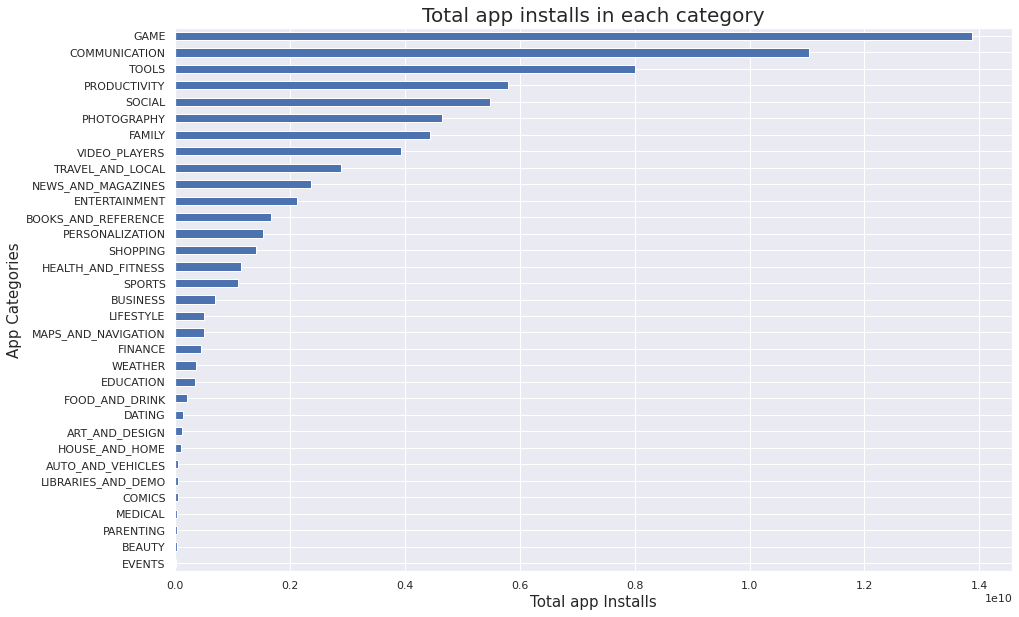

In [ ]:
# Chart - 1 visualization code

# total app installs in each category of the play store

a = Play_Store_df.groupby(['Category'])['Installs'].sum().sort_values()
a.plot.barh(figsize=(15,10), color = 'b', )
plt.ylabel('App Categories', fontsize = 15)
plt.xlabel('Total app Installs', fontsize = 15)
plt.xticks()
plt.title('Total app installs in each category', fontsize = 20)

##### 1. Why did you pick the specific chart?

To see the spread of Installation based on category

##### 2. What is/are the insight(s) found from the chart?

- In terms of usage i.e. Installations, the Games Category tops the charts.
- Even though the Family Category has maximum available apps, Games has maximum installs.
- Communication which has only 3.26% apps out of the total apps, has second highest installs. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The number of App installs based on category gives a benchmark to estimate how many installs an App can expect when launched under a specific category.

#### Chart -2 - Distribution Plot of Ratings

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


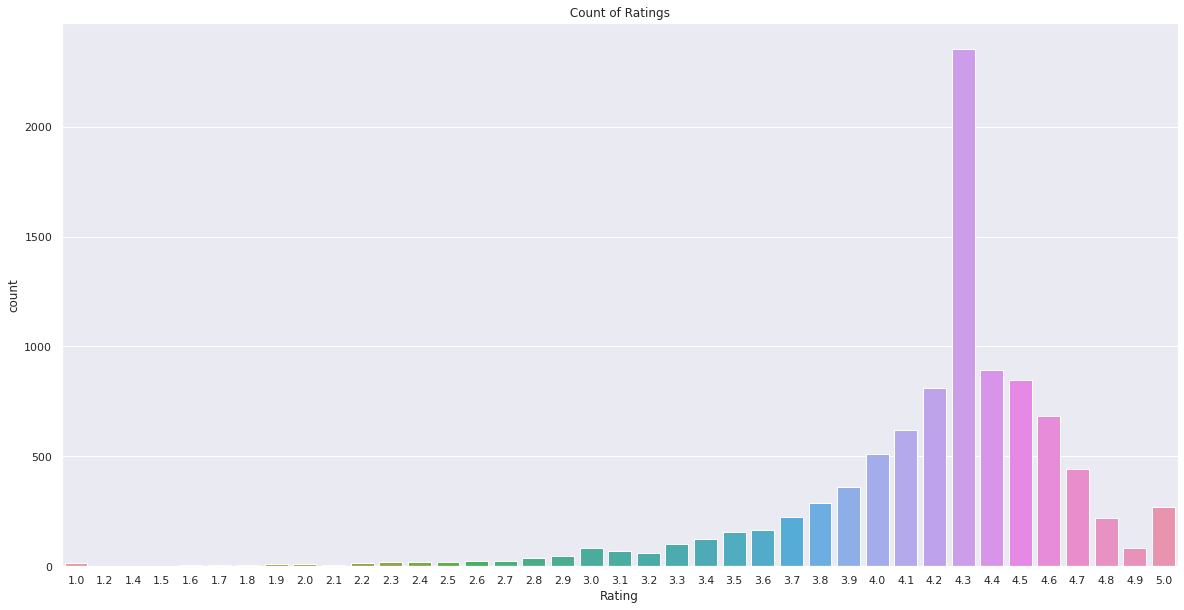

In [ ]:
# Chart - 2 visualization code

# Distribution Plot of Ratings Column
rt_plot = sns.countplot(Play_Store_df['Rating'])
sns.set(rc={'figure.figsize':(10,20)})
plt.title(" Count of Ratings ")
plt.show()

##### 1. Why did you pick the specific chart?

To see the distribution of Ratings in the dataset.

##### 2. What is/are the insight(s) found from the chart?

From the above plot we can conclude that the most apps are rated between 4 and 5.

There are also some apps , those are rated less than 3.
Maximun number of apps are rated between 4.1 and 4.5.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This shows that optimally an app should receive a 5 star rating, but as the as the number of ratings will increase, the Rating should fall in a range above 4.3 stars.

#### Chart - 3 - Bar Graph for Ratings Count

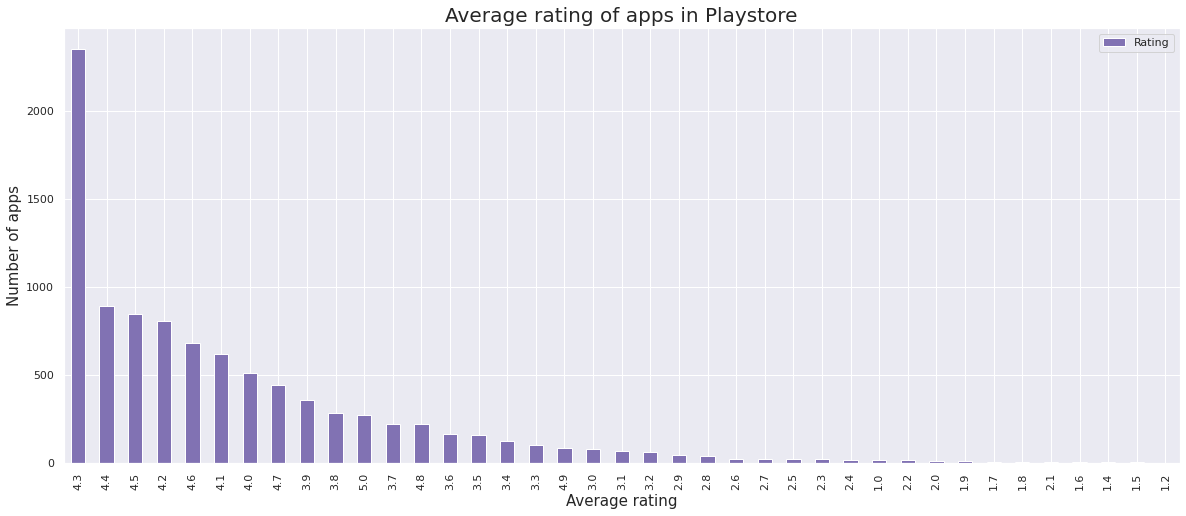

In [ ]:
# Chart - 3 visualization code

# Average App Ratings

Play_Store_df['Rating'].value_counts().plot.bar(figsize=(20,8), color = 'm' )
plt.xlabel('Average rating',fontsize = 15 )
plt.ylabel('Number of apps', fontsize = 15)
plt.title('Average rating of apps in Playstore', fontsize = 20)
plt.legend()

##### 1. Why did you pick the specific chart?

To see the count of Ratings.

##### 2. What is/are the insight(s) found from the chart?

4.3 Stars in the has the maximum counts, i.e. it is the most common rating received. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The spread of Ratings isfrom 1.0 to 5.0 but it is better to categorise them into the following classes:
- Top Rated for Apps with Rating greater than 4.0
- Above Average for Apps with Rating greater than 3.0 and less than 4.0
- Average for Apps with Rating greater than 2.0 and less than 3.0
- Below Average for Apps with Rating less than 2.0

#### Chart - 4 - Pie Chart for Ratings Range

In [ ]:
# Create a function to Categorise apps based on rating range
def Rate_method(Rating):
  if Rating >= 4:
    return "Top Rated"
  elif Rating >= 3 and Rating < 4:
    return "Above Average"
  elif Rating >= 2 and Rating < 3:
    return "Average"
  else:
    return "Below Average" 

In [ ]:
Play_Store_df["Rating_Range"] = Play_Store_df['Rating'].apply(lambda x: Rate_method(x))

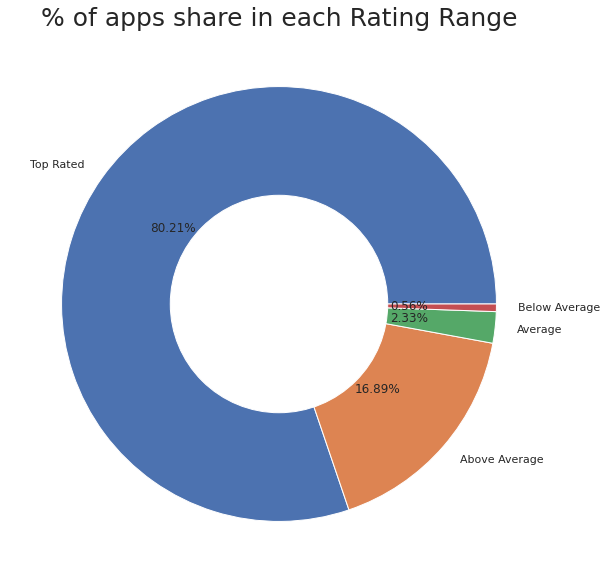

In [ ]:
# Chart - 4 visualization code

plt.figure(figsize=(10,10))
plt.pie(Play_Store_df.Rating_Range.value_counts(), labels=Play_Store_df.Rating_Range.value_counts().index, autopct='%1.2f%%')
my_circle = plt.Circle( (0,0), 0.50, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('% of apps share in each Rating Range', fontsize = 25)
plt.show()

##### 1. Why did you pick the specific chart?

To quantitatively define the Rating Ranges

##### 2. What is/are the insight(s) found from the chart?

The overall result shows most apps are Top Rated, specifically:
- 80.21 % TOP RATED
- 16.89 % ABOVE AVERAGE
- 2.33 % AVERAGE
- 0.56 % BELOW AVERAGE

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Majority of Apps are Top Rated. Thus Rating alone is not a suitable variable to determine the perforamnce of an App

#### Chart - 5 - Joint Plot for Ratings vs Size

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.02, 'Rating vs Size of Apps')

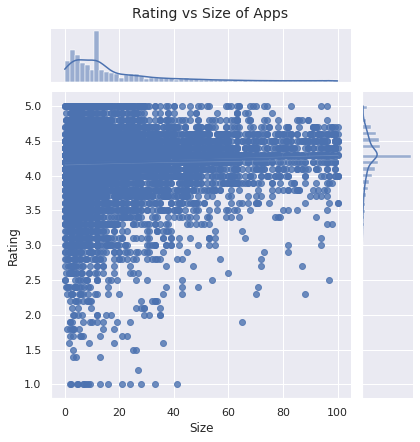

In [ ]:
# Chart - 5 visualization code
# Relation between Rating & Size
sns.set_style("darkgrid")
ax = sns.jointplot(Play_Store_df['Size'], Play_Store_df['Rating'], kind="reg")
ax.fig.suptitle("Rating vs Size of Apps", y = 1.02, fontsize=14 )

##### 1. Why did you pick the specific chart?

To check the general relationship between size and rating


##### 2. What is/are the insight(s) found from the chart?

- The apps at the lower size range are rated distributively. 
- They also contribute to the lowest rated app while the apps of greater size range are rated better as compared to the apps of small size range. 
- The frequency of the small apps is also way too high than the apps with large size. 
-The maximum number of apps is around 20000 in size

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes the insights will help in determining thw size range of a new APP


#### Chart - 6 - Line Plot for Size vs Rating for each Category of Apps

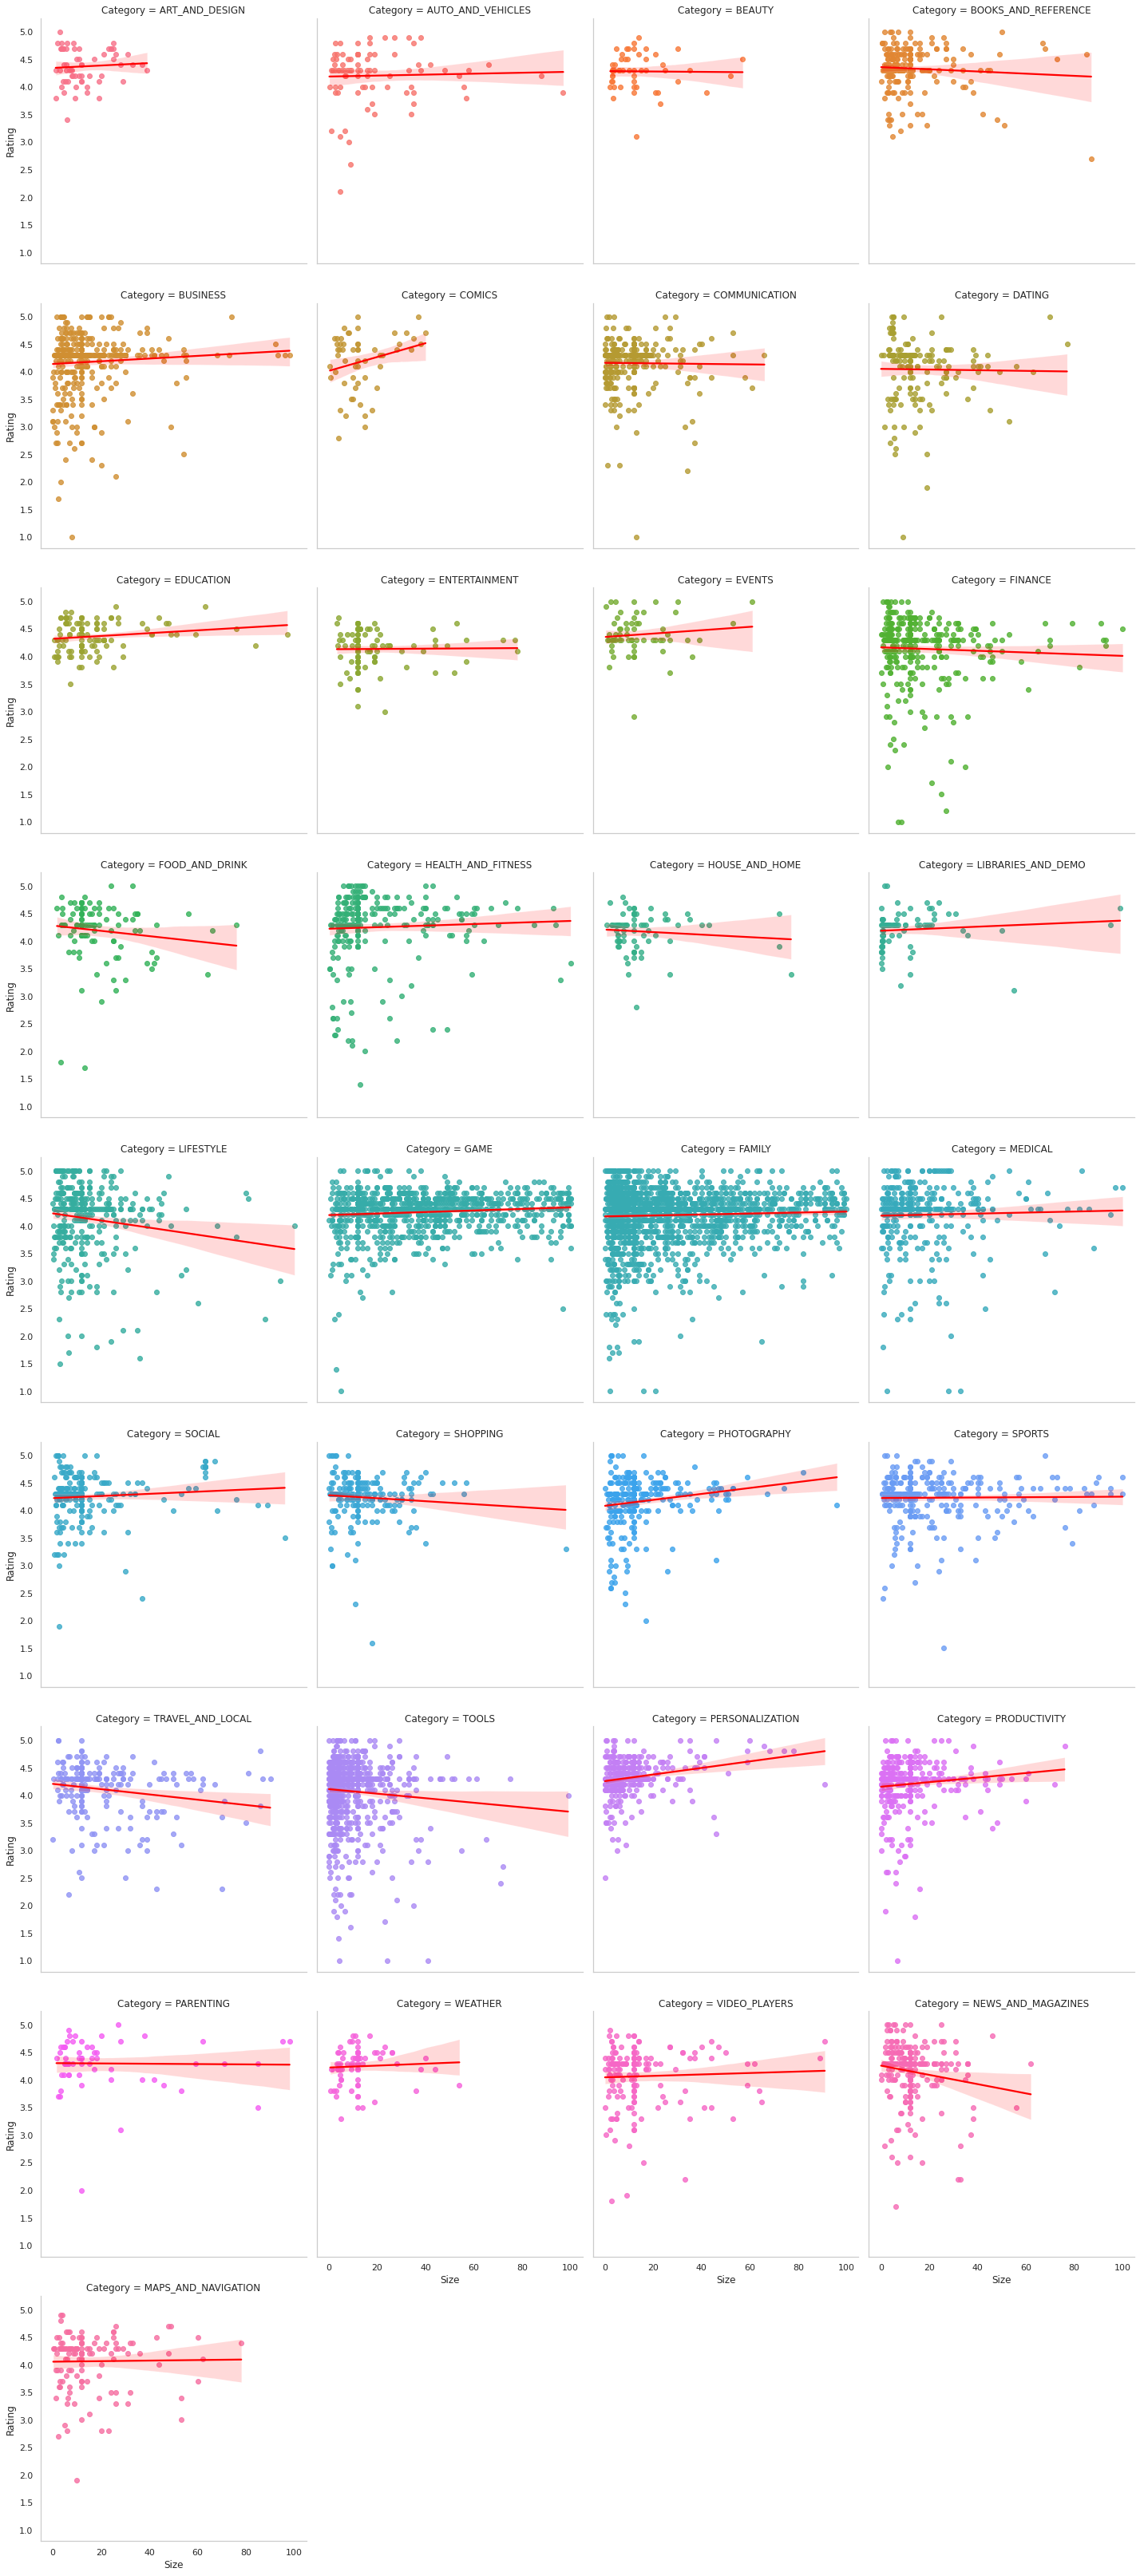

In [ ]:
# Chart - 6 visualization code
# Size vs Rating for each Category
sns.set_style("whitegrid", {'axes.grid' : False})
sns.lmplot(y='Rating',x='Size',data=Play_Store_df,col="Category", hue="Category",col_wrap=4,line_kws={'color': 'red'})

##### 1. Why did you pick the specific chart?

To understand the sizing strategy based on category.

##### 2. What is/are the insight(s) found from the chart?

Based on category we can conclude the following:
- In case of large quantitiy of apps available specifically in the Family and Games category, there is no specific trend to Size vs Rating.
- Others have a noticable trend of increasing or decreasing slopes.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This will help developers decide on the appropriate sizing for a new App.

#### Chart - 7 - Bar Plot for App Categories for Large Sized Apps

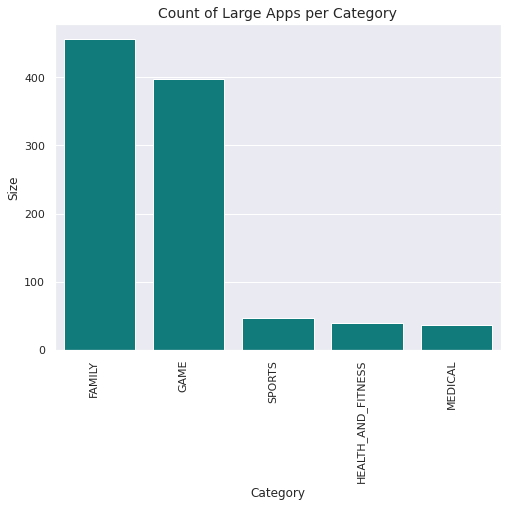

In [ ]:
# Chart - 7 visualization code
# Large Sized Apps > 40 MB
Large_Apps = Play_Store_df[Play_Store_df["Size"]>40]
group_category = Large_Apps.groupby("Category")["Size"].count().sort_values(ascending=False).reset_index().head()

plt.figure(figsize=(8, 6))
sns.set(font_scale=1)
sns.set_style("darkgrid")
ax = sns.barplot(x="Category", y="Size", data=group_category, color = "darkcyan")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.title('Count of Large Apps per Category',size = 14)
plt.savefig("Count_large")

##### 1. Why did you pick the specific chart?

To see the cocentration of large sized Apps belong to which categories.

##### 2. What is/are the insight(s) found from the chart?

The Family Category has maximum number of Apps of Large Size followed by Games. But, the count of large sized apps drastically falls in other categories. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This will also help to determine best possible sizing strategy.

#### Chart - 8 - Bar Plot for Content Rating

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


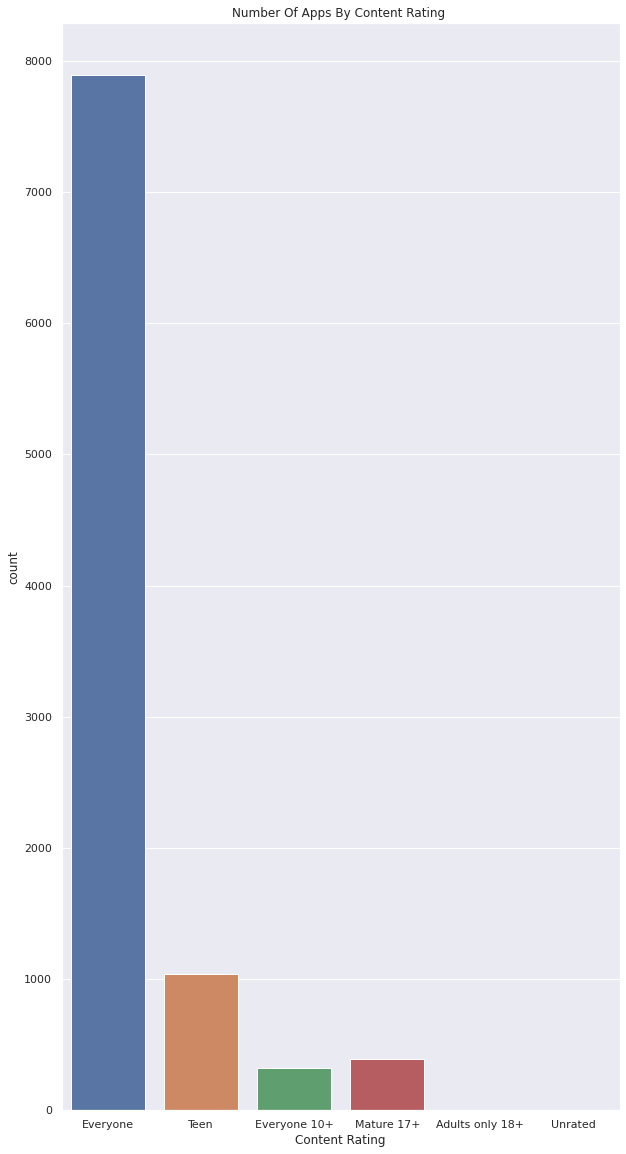

In [ ]:
# Chart - 8 visualization code

ct_plot = sns.countplot(Play_Store_df["Content Rating"])
plt.title("Number Of Apps By Content Rating ")
sns.set (rc={'figure.figsize':(30,10)})
plt.show()

In [ ]:
# Droping "Unrated" values
no_recs = Play_Store_df[Play_Store_df['Content Rating']== "Unrated"]
Play_Store_df=Play_Store_df.drop(no_recs.index)

In [ ]:
# Droping "Adults only 18+" values
no_recs = Play_Store_df[Play_Store_df['Content Rating']=="Adults only 18+"]
Play_Store_df = Play_Store_df.drop(no_recs.index)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


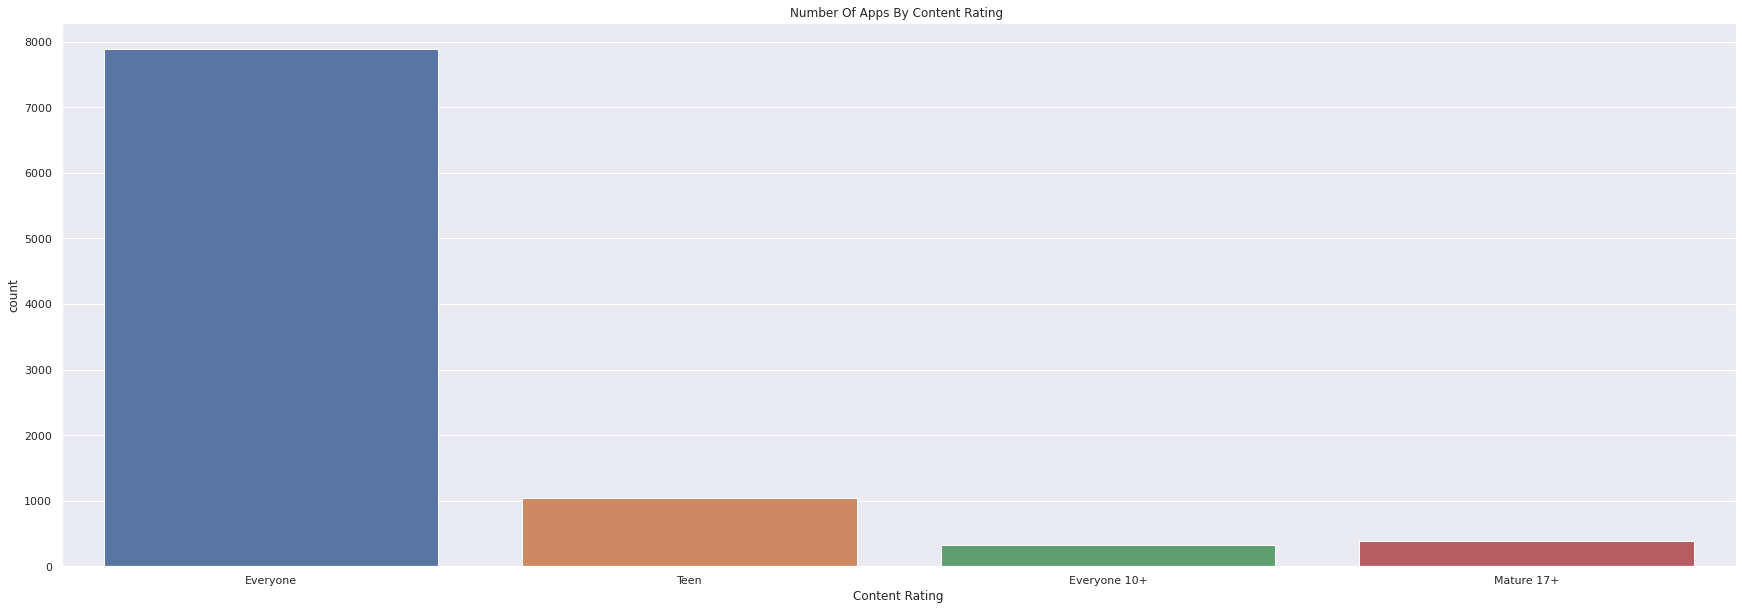

In [ ]:
ct_plot = sns.countplot(Play_Store_df["Content Rating"])
plt.title("Number Of Apps By Content Rating ")
sns.set (rc={'figure.figsize':(30,10)})
plt.show()

##### 1. Why did you pick the specific chart?

To check the Content Category distribution

##### 2. What is/are the insight(s) found from the chart?

- Maximum numbers of apps on the playstore are for 'Everyone' category.
- As we can see there are some almost empty values like 'adults only 18+' and 'unrated'.
- So, here we're  going to drop these values as they won't help in the analysis. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As majority of Apps are in the Everyone category, this content rating doesnot effect performance

#### Chart - 9 - Bar Plot for Top Categories

In [ ]:
#TOP Categories

Play_Store_df.groupby("Category")["App"].count().sort_values(ascending= False)

Category
FAMILY                 1827
GAME                    959
TOOLS                   824
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         374
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  324
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     221
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       83
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           63
PARENTING                60
COMICS                   54
BEAUTY                   53
Name: App, dtype: int64

In [ ]:
x = Play_Store_df['Category'].value_counts()
y = Play_Store_df['Category'].value_counts().index
x_list = []
y_list = []
for i in range(len(x)):
    x_list.append(x[i])
    y_list.append(y[i])

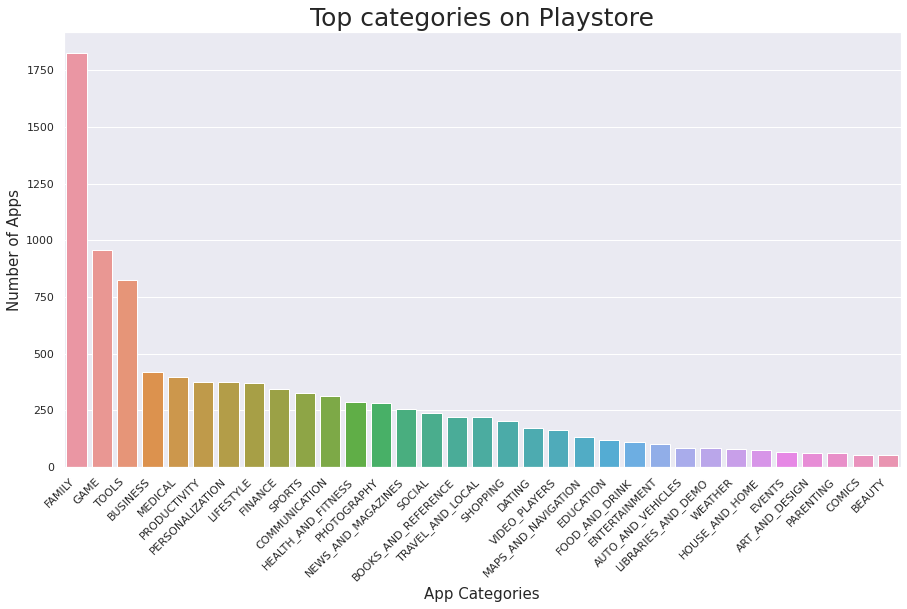

In [ ]:
# Chart - 9 visualization code
# Number of apps belonging to each category in the playstore
plt.figure(figsize=(15,8))
plt.xlabel('App Categories', size=15)
plt.ylabel('Number of Apps', size=15)
graph = sns.barplot(y = x_list, x = y_list)
graph.set_title("Top categories on Playstore", fontsize = 25)
graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right',);

##### 1. Why did you pick the specific chart?

To see which category has maximum number of Apps.

##### 2. What is/are the insight(s) found from the chart?

- Top 3 most populated categories are of Family, Games and Tools.
- Least number of Apps are in the Beauty category.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This chart along with Chart 1 shows that there is no direct coorelation for number of apps in any category to number of downloads in that category.

#### Chart - 10 - Pie Plot for Percentage of Apps in each Category

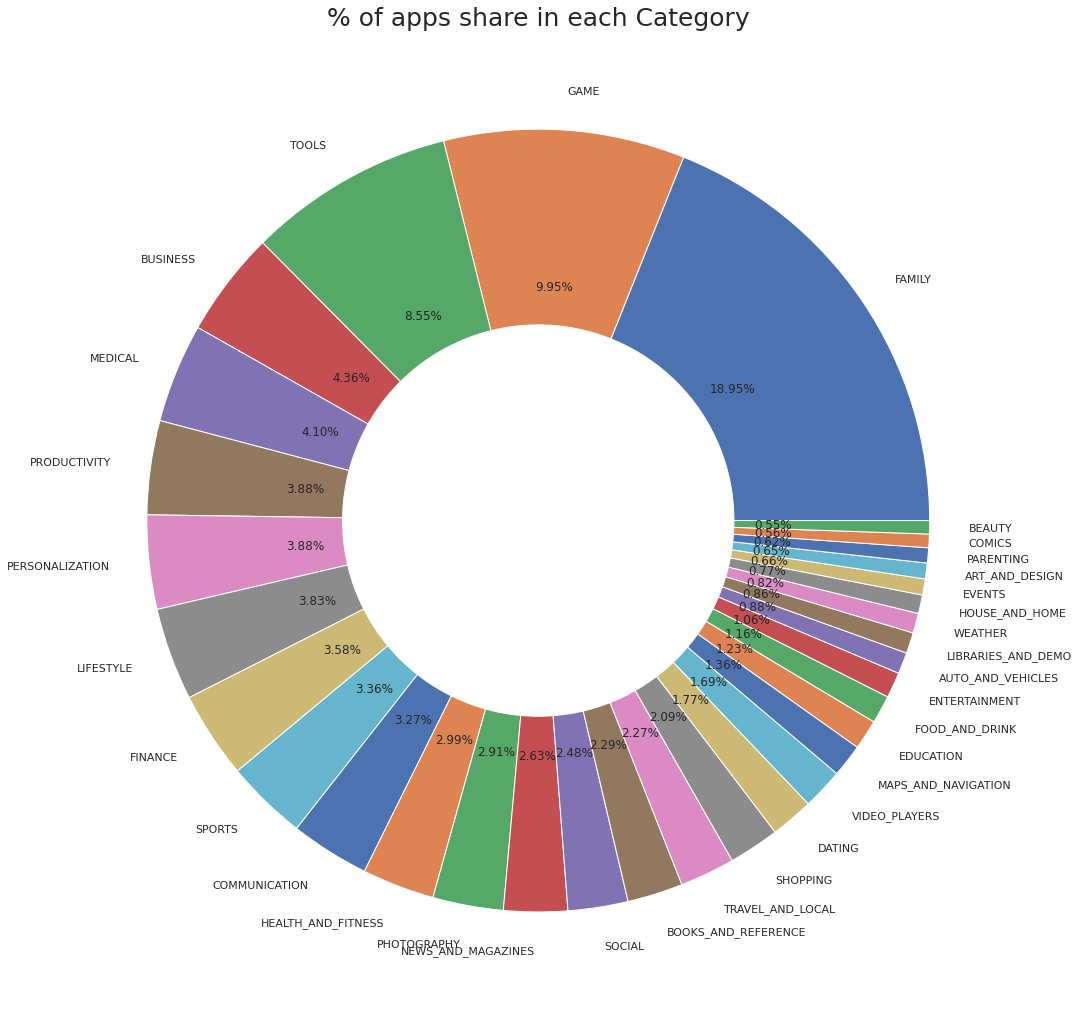

In [ ]:
# Chart - 10 visualization code
# Percentage of apps belonging to each category in the playstore
plt.figure(figsize=(18,18))
plt.pie(Play_Store_df.Category.value_counts(), labels=Play_Store_df.Category.value_counts().index, autopct='%1.2f%%')
my_circle = plt.Circle( (0,0), 0.50, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('% of apps share in each Category', fontsize = 25)
plt.show()

##### 1. Why did you pick the specific chart?

To quantify the proportional share of categories.

##### 2. What is/are the insight(s) found from the chart?

- The results show that the Family Category has the highest number of availabe apps and also contain maximum large sized apps. 
- A similar patter of size to availability is for Games Category also, but that is where the trend ends.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The Games Category which has half the number of apps as compared to the Family Category has more number of installs. Thus the quality of an apps performance is not directy related to the Category.

#### Chart - 11 - Horizontal Bar Plot for Installation Counts in each Category

Text(0.5, 1.0, 'Total app installs in each category')

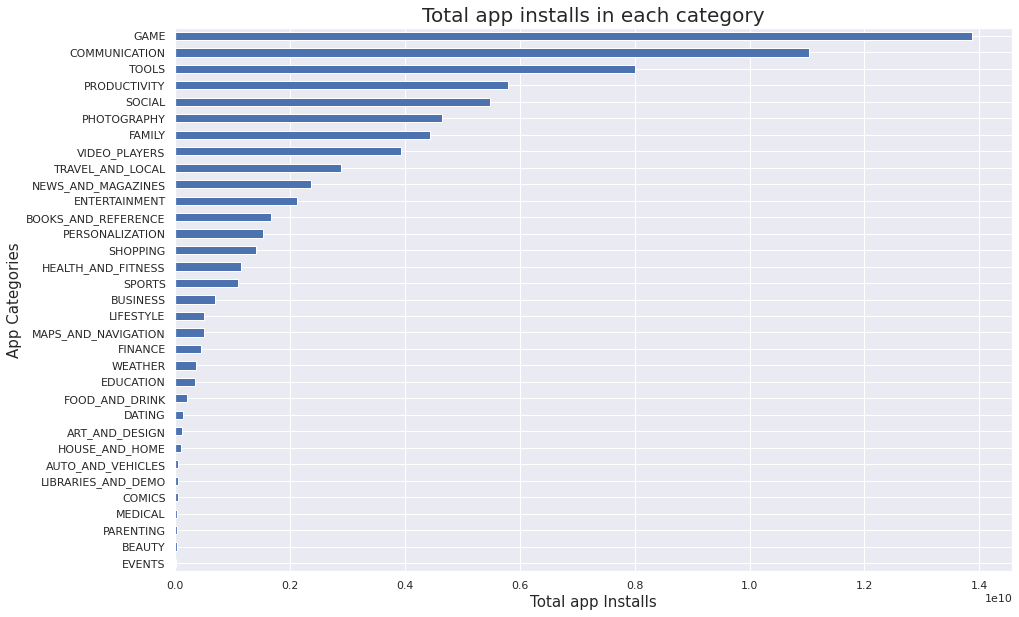

In [ ]:
# Chart - 11 visualization code
# total app installs in each category of the play store

a = Play_Store_df.groupby(['Category'])['Installs'].sum().sort_values()
a.plot.barh(figsize=(15,10), color = 'b', )
plt.ylabel('App Categories', fontsize = 15)
plt.xlabel('Total app Installs', fontsize = 15)
plt.xticks()
plt.title('Total app installs in each category', fontsize = 20)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

- In terms of usage i.e. Installations, the Games Category tops the charts.
- Even though the Family Category has maximum available apps, Games has maximum installs.
- Communication which has only 3.26% apps out of the total apps, has second highest installs.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12 - Horizontal Bar Plot for Genre Counts

''

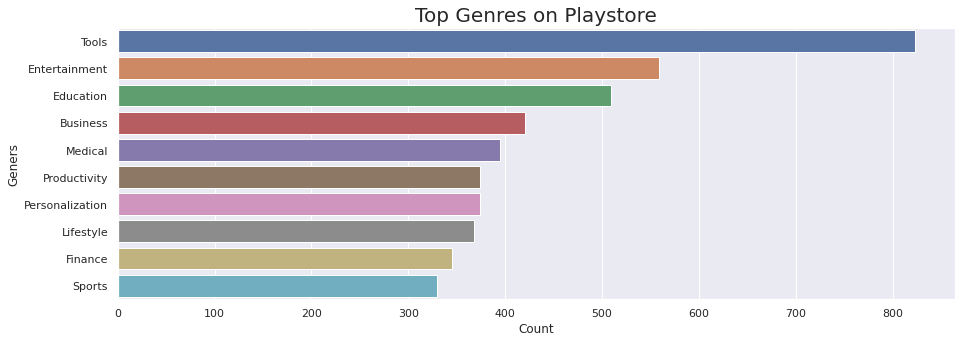

In [ ]:
# Chart - 12 visualization code
y = Play_Store_df['Genres'].value_counts().index
x = Play_Store_df['Genres'].value_counts().head(10)
xsisG = []
ysisG = []
for i in range(len(x)):
    xsisG.append(x[i])
    ysisG.append(y[i])

plt.figure(figsize=(15,5))
plt.xlabel("Count")
plt.ylabel("Geners")

graph = sns.barplot(x = xsisG, y = ysisG,)
graph.set_title("Top Genres on Playstore", fontsize = 20);""

##### 1. Why did you pick the specific chart?

To determine the most popular genres in the Play Store.

##### 2. What is/are the insight(s) found from the chart?

- The Tools Genre has maximum number of Apps.
- The Entertainment and Education Genres have most number of Apps after Tools.
- Remaining Genres have approximately similar number of Apps.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, Genre has greater importance than categories.

#### Chart - 13 - Bar Plot for Top 5 Apps with highest Reviews 

Text(0.5, 1.0, 'Top 5 Apps with Maximum Reviews')

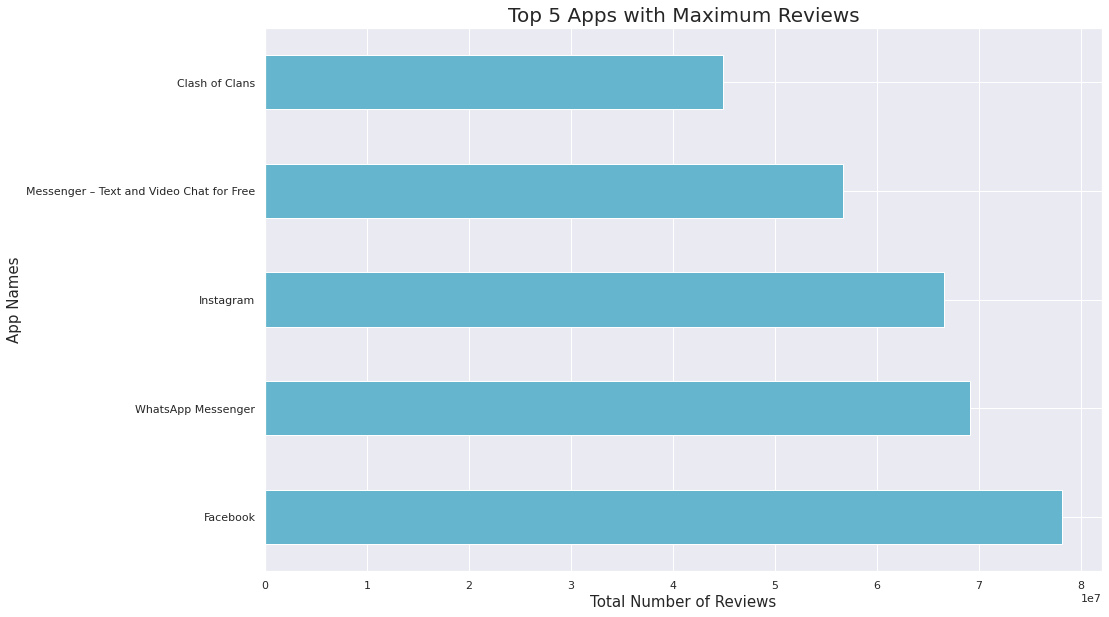

In [ ]:
# Chart - 13 visualization code
# Apps with Maximum Reviews
b = Play_Store_df.groupby("App")['Reviews'].sum().sort_values(ascending = False).head()
b.plot.barh(figsize=(15,10), color = 'c' )
plt.ylabel('App Names', fontsize = 15)
plt.xlabel('Total Number of Reviews', fontsize = 15)
plt.xticks()
plt.title('Top 5 Apps with Maximum Reviews', fontsize = 20)

##### 1. Why did you pick the specific chart?

To check which App has the maximum number of Reviews.

##### 2. What is/are the insight(s) found from the chart?

- A high concentration of reviews are for the Commuication Category.
- Considering the fact that Installs and Reviews are positively correlated, this outcome is to be expected following the Highest Installs graph above.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

No

#### Chart - 14 - Correlation Heatmap

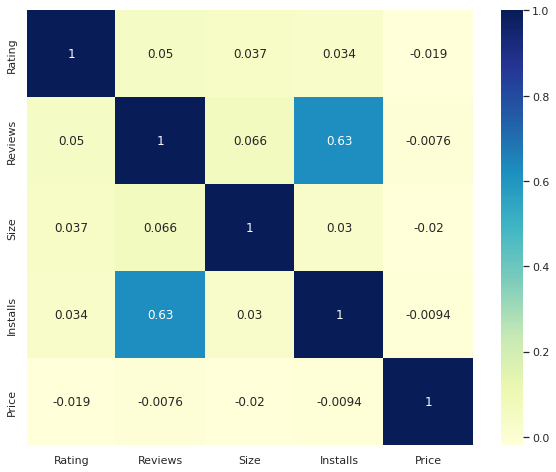

In [ ]:
# Correlation Heatmap visualization code

# Correlation Heat Map
corr_data = Play_Store_df.corr(method = 'pearson')
plt.figure(figsize = (10,8))
dataplot = sns.heatmap(corr_data, cmap="YlGnBu", annot=True)
plt.show()

##### 1. Why did you pick the specific chart?

The objective of this chart was to see if any of the Columns among Ratings, Reviews, Size, Installs and Price show any direct coorelation

##### 2. What is/are the insight(s) found from the chart?

- There is a positive correlation between the Reviews and Installs column. This is pretty much obvious. Higher the number of installs, higher is the user base, and higher are the total number of reviews dropped by the users.
- The Price is slightly negatively correlated with the Rating, Reviews, and Installs. This means that as the prices of the app increases, the average rating, total number of reviews and Installs fall slightly.
- The Rating is slightly positively correlated with the Installs and Reviews column. This indicates that as the the average user rating increases, the app installs and number of reviews also increase.

#### Chart - 15 - Pair Plot 

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Pairwise Plot - Rating, Size, Installs, Reviews, Price')

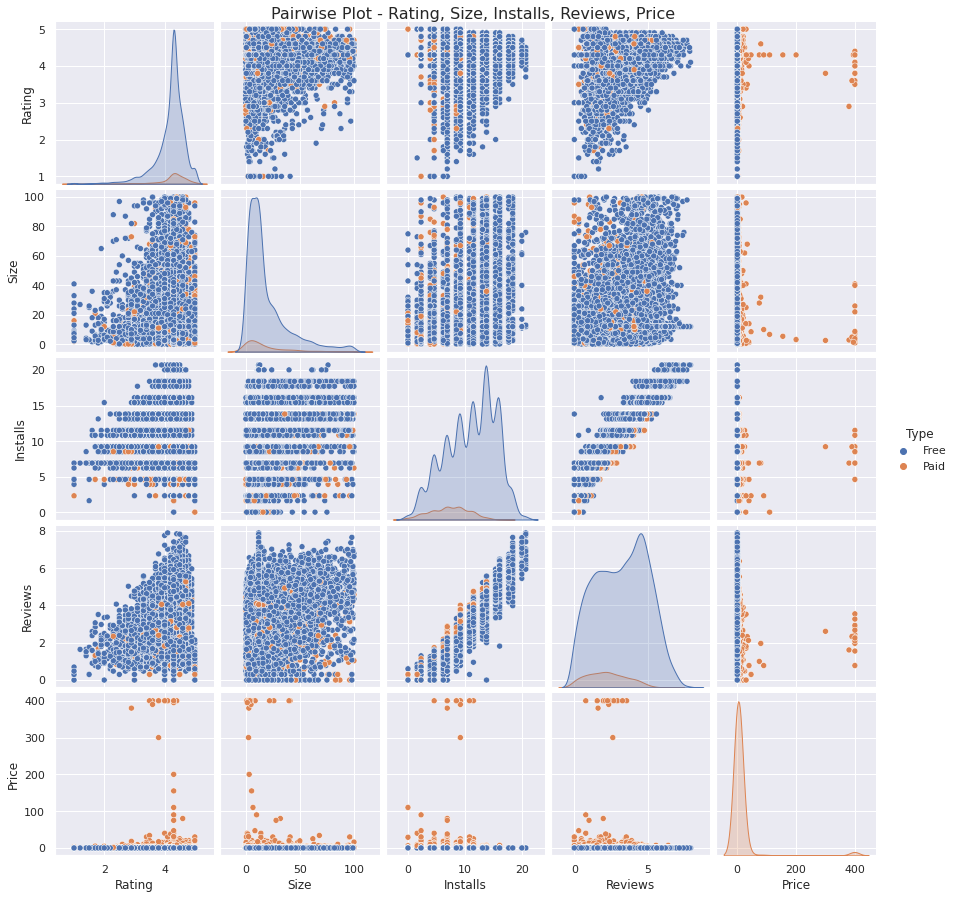

In [ ]:
# Pair Plot visualization code

# Pair Plot of all variables
Rating = Play_Store_df['Rating']
Size = Play_Store_df['Size']
Installs = Play_Store_df['Installs']
Reviews = Play_Store_df['Reviews']
Type = Play_Store_df['Type']
Price = Play_Store_df['Price']

p = sns.pairplot(pd.DataFrame(list(zip(Rating, Size, np.log(Installs), np.log10(Reviews), Price, Type)), 
                        columns=['Rating','Size', 'Installs', 'Reviews', 'Price','Type']), hue='Type')
p.fig.suptitle("Pairwise Plot - Rating, Size, Installs, Reviews, Price",x=0.5, y=1.0, fontsize=16)

##### 1. Why did you pick the specific chart?

This plot shows all possible relationships between variables and is a good indicator to check with correlation.

##### 2. What is/are the insight(s) found from the chart?

From the Pair Plot we can visualize any possible patterns among the data pairs. As seen in the correlation plot there is a visible relation between Installs and Reviews. Also for Paid apps, there are some patterns for the Reviews to Price and also for Installs to Price but the outcomes are difficult to analyse and determine any trend.

Some inferences are as follows:
- Most of the App are Free.
- Most of the Paid Apps have Rating around 4
- As the number of installation increases the number of reviews of the particaular app also increases.

#### Chart - 16 - Bar Graph for Top 10 Apps in any Category

In [ ]:
# Top 10 Apps in any Category

def Top_10_catergory(str):
    str = str.upper()
    top10 = Play_Store_df[Play_Store_df['Category'] == str]
    top10apps = top10.sort_values(by='Installs', ascending=False).head(10)
    plt.figure(figsize=(10,6), dpi=100)
    plt.title('Top 10 Installed Apps',size = 20)  
    graph = sns.barplot(x = top10apps.App, y = top10apps.Installs, palette= "icefire")
    graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right')

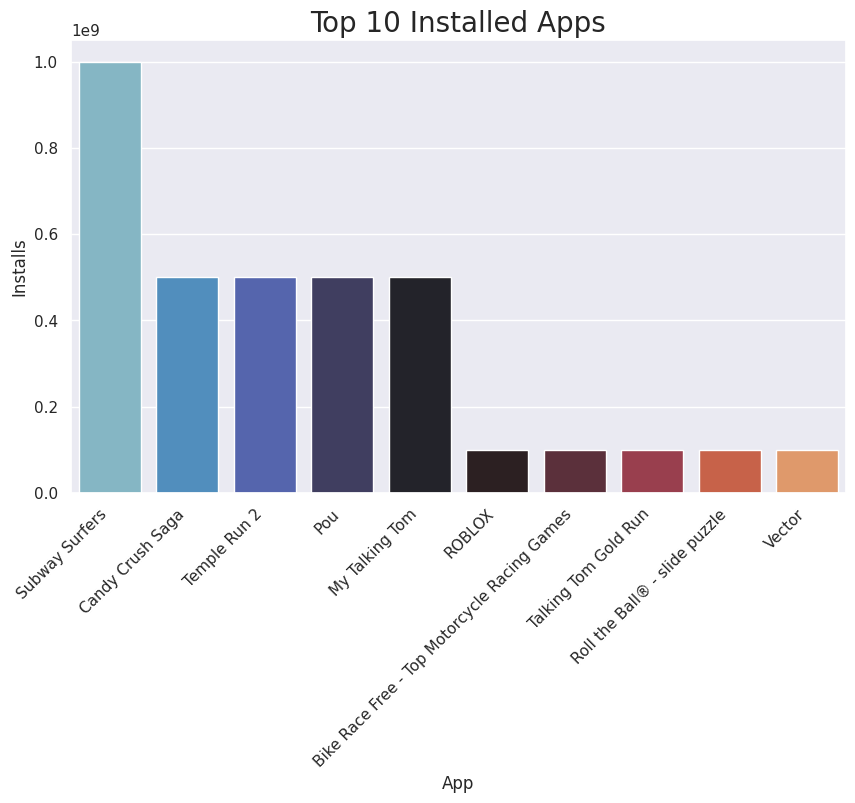

In [ ]:
Top_10_catergory('Game')

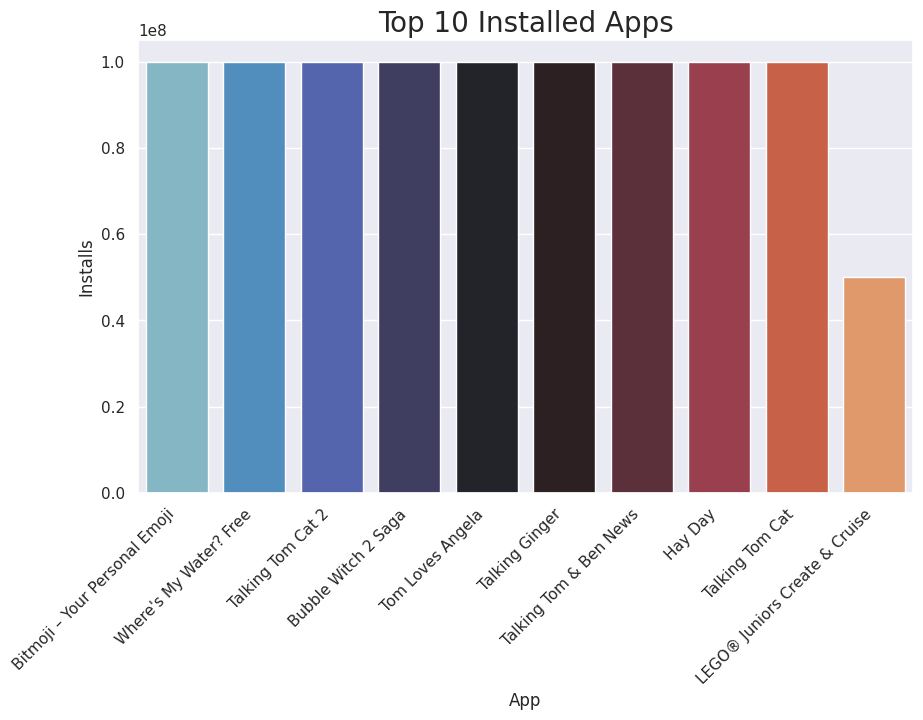

In [ ]:
Top_10_catergory('Family')

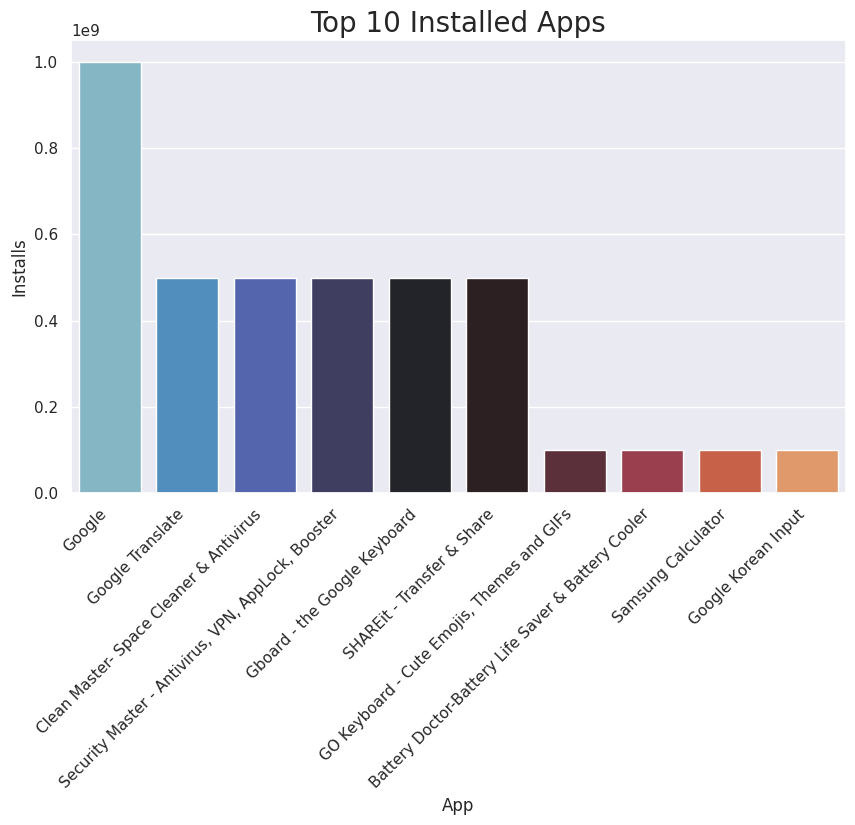

In [ ]:
Top_10_catergory('Tools')

##### 1. Why did you pick the specific chart?

This was created to see for each category which are the top 10 installed apps.

##### 2. What is/are the insight(s) found from the chart?



Nothing Really.

#### Chart - 17 - Pie Plot for Free to Paid Apps Ratio

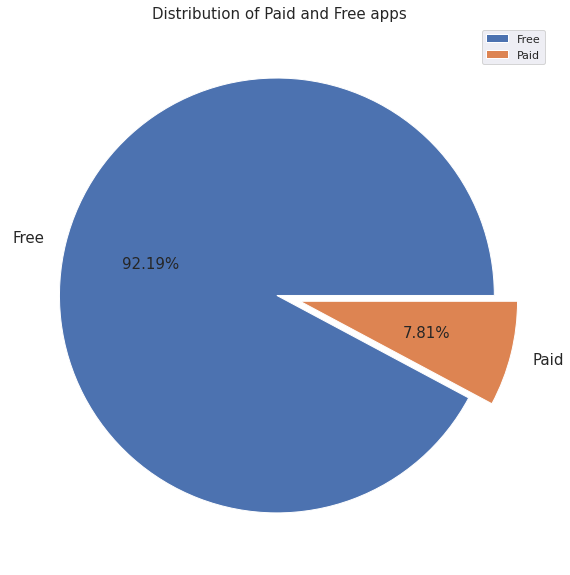

In [ ]:
data = Play_Store_df['Type'].value_counts() 
labels = ['Free', 'Paid']

# create pie chart
plt.figure(figsize=(10,10))
colors = ["#00EE76","#7B8895"]
explode=(0.01,0.1)
plt.pie(data, labels = labels, autopct='%.2f%%',explode=explode,textprops={'fontsize': 15})
plt.title('Distribution of Paid and Free apps',size=15,loc='center')
plt.legend()

##### 1. Why did you pick the specific chart?

To see the percentage distribution of Paid vs Free Apps

##### 2. What is/are the insight(s) found from the chart?


- Majority of Apps are free and from our data set 92% Apps are Free

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As most Apps are free, new apps to be launched must be free to download.

#### Chart - 18 - Bar Plot for Top Free Apps Category

In [ ]:
#TOP Free APPS
PS_df_Free = Play_Store_df[Play_Store_df['Type'] == 'Free']

In [ ]:
PS_df_Top_Free = PS_df_Free[PS_df_Free['Installs'] == PS_df_Free['Installs'].max()]
Top_10_free_apps = PS_df_Top_Free.nlargest(10, 'Installs', keep = 'first')

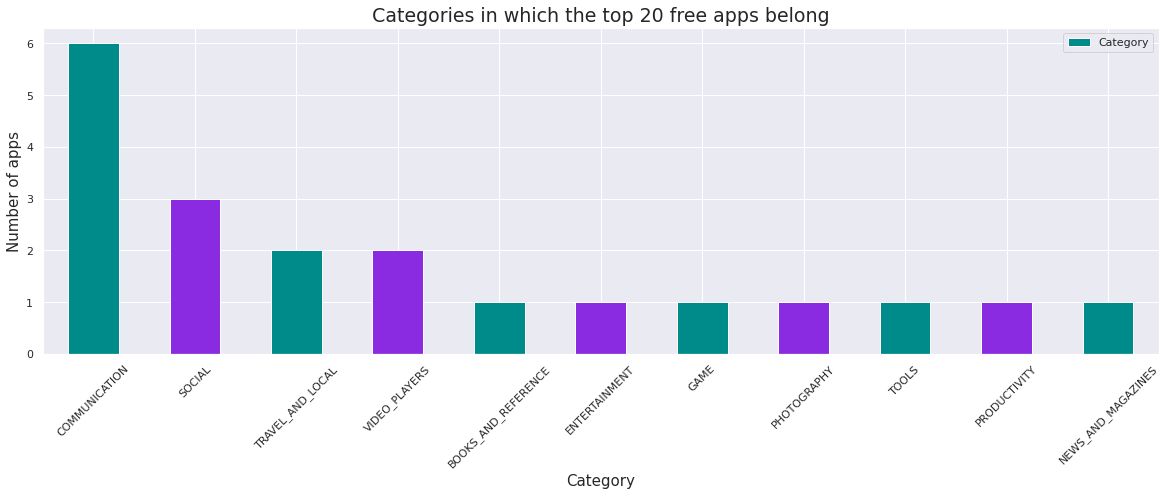

In [ ]:
# Categories in which the top 20 free apps belong to
PS_df_Top_Free['Category'].value_counts().plot.bar(figsize=(20,6), color= ('darkcyan','blueviolet'))
plt.xlabel('Category', size=15)
plt.ylabel('Number of apps', size=15)
plt.title('Categories in which the top 20 free apps belong', size=19)
plt.xticks(rotation=45)
plt.legend()

##### 1. Why did you pick this specific chart?



To see which Category has maximum free Apps

##### 2. What is/are the insight(s) found from the chart?

- The maximunm number of Free Apps are in the Communication Category.
- Social is the second largest category for free apps.
- It can be said that Apps in the categories where their purpose is to connect people have majority free options. 
- Mobile Phones are essentially a means to connect and communicate with others. These apps simply provide a different UI to do the same task and hence should be free to use.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This helps to understand the pricing strategy for an app based on category in which it belongs.

#### Chart - 19 - Bar Plot for Paid Apps Category

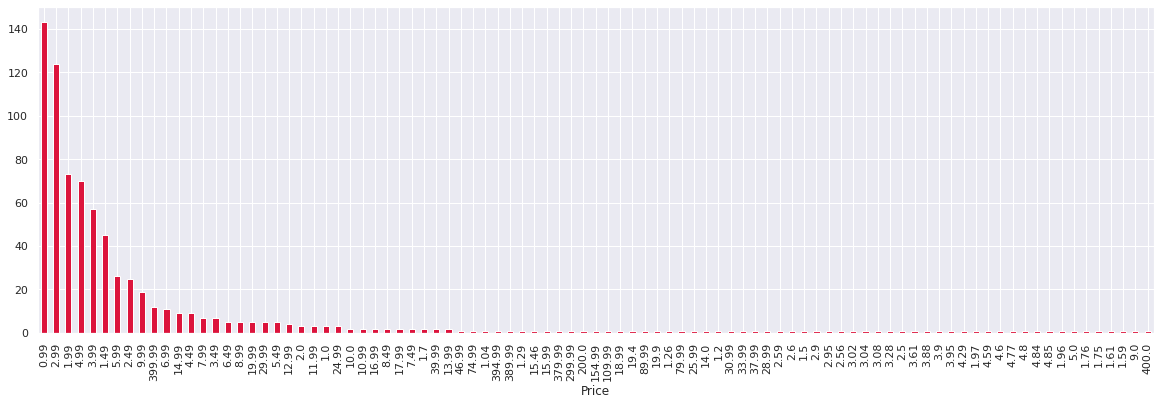

In [ ]:
# Creating a df containing only paid apps
paid_df=Play_Store_df[Play_Store_df['Type']=='Paid']
# Number of apps that can be installed at a particular price 

paid_df.groupby('Price')['App'].count().sort_values(ascending= False).plot.bar(figsize = (20,6), color = 'crimson')

##### 1. Why did you pick this specific chart?


To check the general pricing of Apps.

##### 2. What is/are the insight(s) found from the chart?

- The variation in pricing of apps is wide spread in terms of cost to install.
- Some apps that charge a small amount whereas others charge a larger amount. The variation lies from USD 0.99 to USD 400.
- The apps that charges a lower installation fee will be installed by more number of people in general. Thus only installation count is an inacurate measure to determine revenue generation.
- A better way to determine the top apps in the paid category is by finding the revenue it generated through app installs.
This is given by:
Revenue generated through installs = (Number of installs)x(Price to install the app)

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This helps to understand the pricing strategy for an app based on category in which it belongs.

#### Chart - 20 - Horizontal Bar Plot for Top Revenue generating Apps

In [ ]:
# Creatng a new column 'Revenue' in paid_df
paid_df['Revenue'] = paid_df['Installs']*paid_df['Price']

<ipython-input-76-f10096abb68f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paid_df['Revenue'] = paid_df['Installs']*paid_df['Price']


In [ ]:
# Top app in the paid category

paid_df[paid_df['Revenue'] == paid_df['Revenue'].max()]

App Category  Rating  Reviews  Size  Installs  Type  Price  \
2241  Minecraft   FAMILY     4.5  2376564  12.0  10000000  Paid   6.99   

     Content Rating                     Genres   Last Updated Current Ver  \
2241   Everyone 10+  Arcade;Action & Adventure  July 24, 2018     1.5.2.1   

             Android Ver Last Update Rating_Range     Revenue  
2241  Varies with device  2018-07-24    Top Rated  69900000.0

In [ ]:
# Top 10 paid apps in the play store
top10paid_apps=paid_df.nlargest(10, 'Revenue', keep='first')
top10paid_apps['App']

2241                        Minecraft
5351                        I am rich
5356                I Am Rich Premium
4034                    Hitman Sniper
7417    Grand Theft Auto: San Andreas
2883              Facetune - For Free
5578          Sleep as Android Unlock
8804              DraStic DS Emulator
4367         I'm Rich - Trump Edition
4362                       💎 I'm rich
Name: App, dtype: object

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0, flags=flags)


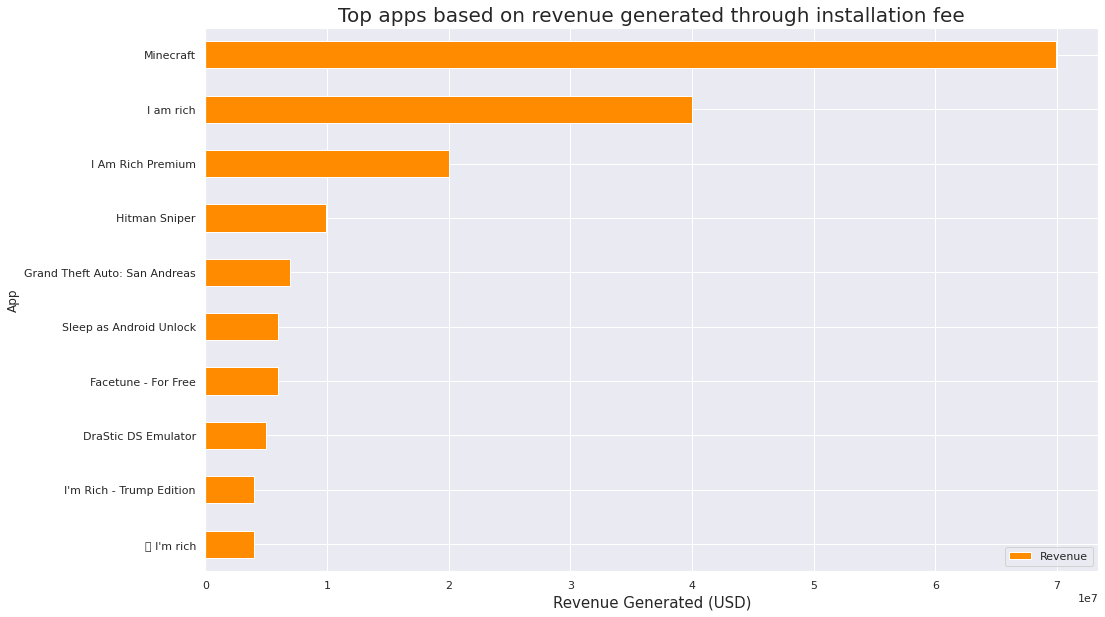

In [ ]:
# Top paid apps according to the revenue generated through installs alone
top10paid_apps.groupby('App')['Revenue'].mean().sort_values(ascending= True).plot.barh(figsize=(16,10), color='darkorange')
plt.xlabel('Revenue Generated (USD)', size=15)
plt.title('Top apps based on revenue generated through installation fee', size=20)
plt.legend()

##### 1. Why did you pick this specific chart?


To see which App generated maximum Revenue and how it compared to other top grossing Apps.

##### 2. What is/are the insight(s) found from the chart?

Based on the above observations:
- The Highest earning APP is Minecraft from the FAMILY Category.
- The LIFESTYLE Category is the highest earning category.
- GAMES have the second most revenue earnings.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This provides a benchmark to define Revenue targets if the new App has to be bought.

#### Chart - 21 - Category Plot for App Pricing Trends

Text(0.5, 1.0, 'App pricing trend across popular categories')

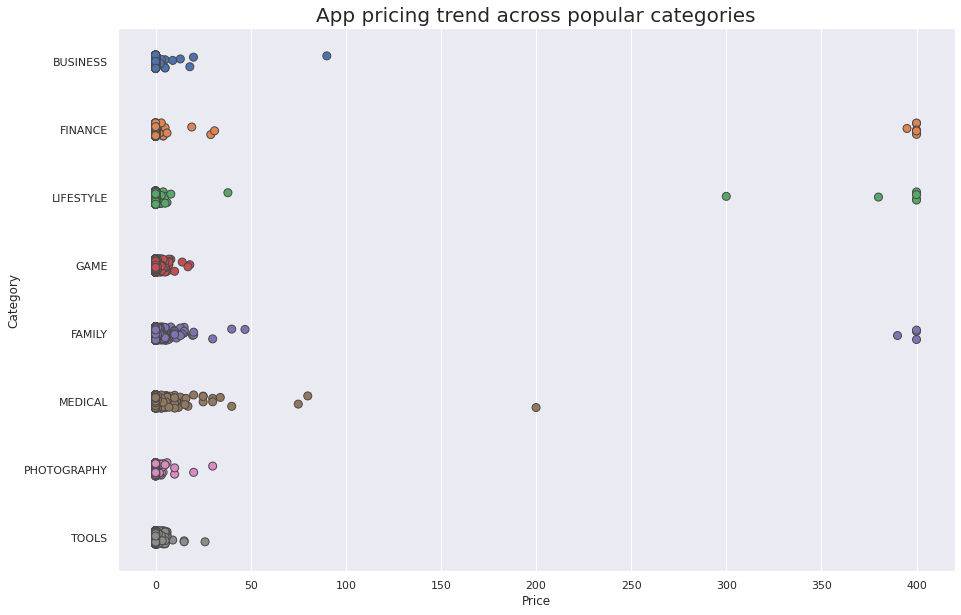

In [ ]:
plt.figure(figsize=(15,10))

# There are some popular app categories in given dataset
popular_app_cats = Play_Store_df[Play_Store_df.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY', 'MEDICAL', 'TOOLS', 'FINANCE','LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs Category
cate_plot = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1 , size=8)
cate_plot.set_title('App pricing trend across popular categories',size=20)

##### 1. Why did you pick this specific chart?


To determine the Pricing Trends in popular Categories.

##### 2. What is/are the insight(s) found from the chart?

Form the above plot we can say that the "FINANCE", "LIFESTYLE", "FAMILY" & "MEDICAL" categories contains more pricey apps than the others.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This can help to build the Pricing Strategy based on Category of App.

####Chart - 22 - Bar Plot comparing Content Ratings of Free vs Paid Apps

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


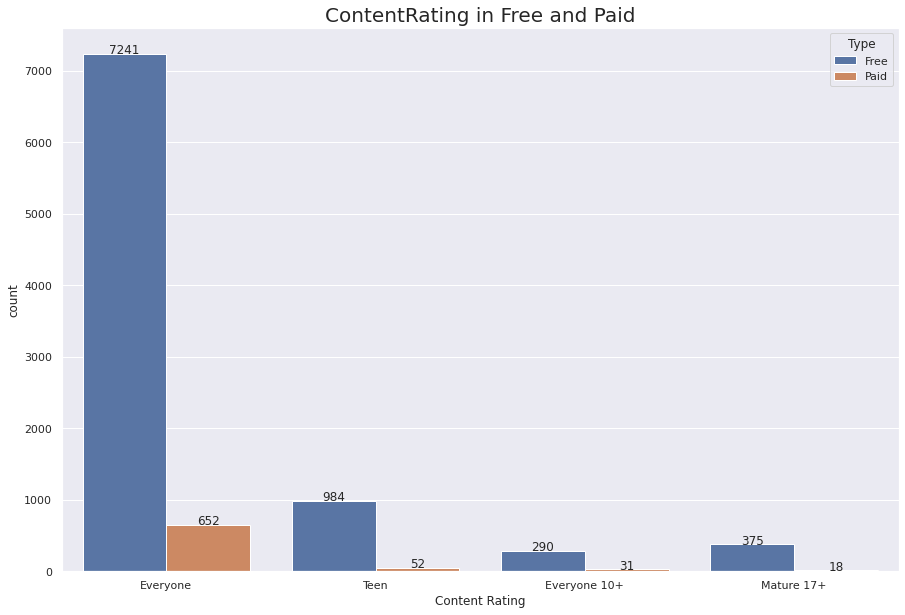

In [ ]:
plt.figure(figsize=(15,10))
rating_plt = sns.countplot(Play_Store_df['Content Rating'],hue=Play_Store_df['Type']);
plt.title("ContentRating in Free and Paid",size=20)

for p in rating_plt.patches:
    rating_plt.annotate(p.get_height(),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 12)
    
plt.show()

##### 1. Why did you pick this specific chart?


To show a comparitive picture of Content Rating Proportions for Free vs Paid Apps

##### 2. What is/are the insight(s) found from the chart?

- Concentration of Apps in Content Rating "Everyone" is 5.14 % more for Paid Apps than for Free Apps.
- Concentration of Apps in Content Rating "Everyone 10 +" is 0.85 % more for Paid Apps than for Free Apps.
- Concentration of Apps in Content Rating "Teen" is 4.16 % more for Free Apps than for Paid Apps.
- Concentration of Apps in Content Rating "Mature 17 +" is 1.83 % more for Free Apps than for Paid Apps.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This helps in the process of developing strategies for deciding on where the new App can be categorized in terms of Genre, Content Rating and Category.

#### Chart - 23 - Pie Plot showing Percentage of Review Sentiments

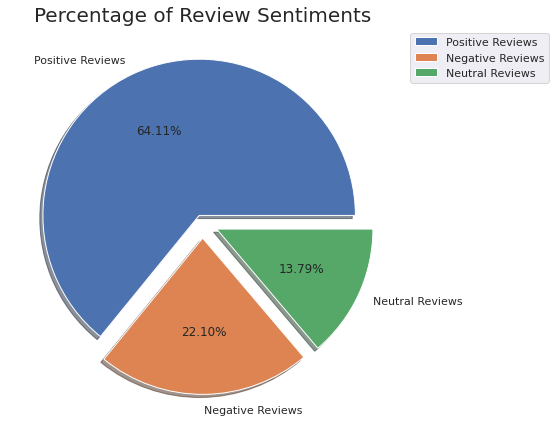

In [ ]:
import matplotlib as mpl
count = list(User_Review_df['Sentiment'].value_counts())
categories_ = 'Positive Reviews', 'Negative Reviews', 'Neutral Reviews'
mpl.rcParams['font.size'] = 12
mpl.rcParams['figure.figsize'] = (7,12)
plt.pie(count, labels=categories_, explode=[0.05, 0.10, 0.10], shadow=True, autopct="%.2f%%")
plt.title('Percentage of Review Sentiments', fontsize=20)
plt.axis('off')
plt.legend(bbox_to_anchor=(0.9, 0, 0.5, 1))
plt.show()

##### 1. Why did you pick this specific chart?

To see the overall share of Sentiment Range across the Play Store.

##### 2. What is/are the insight(s) found from the chart?

We can see that majority of APPS have recerived Positive Reviews:
- Positive Percentage: 64.11%
- Neutral Percentage: 13.79%
- Negative Percentage: 22.10%

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This gives a general perspective for Sentiment Spread in the data set.
Further Analysis based on other features will provide more insights.



#### Chart - 24 - Top 10 Positively Reviewd Apps

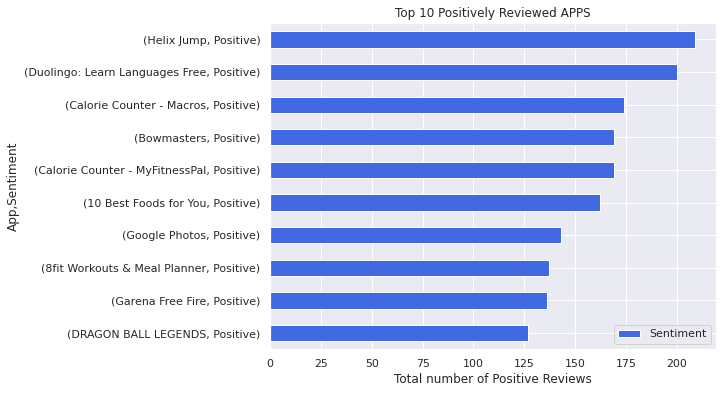

In [ ]:
# Checking for highest number of Positive Revies among all APP
Pos_data = UR_df_positive.groupby('App')['Sentiment'].value_counts().nlargest(10)

Pos_data.plot.barh(figsize = (8,6), color = 'royalblue').invert_yaxis()
plt.title("Top 10 Positively Reviewed APPS")
plt.xlabel('Total number of Positive Reviews')
plt.legend()

##### 1. Why did you pick this specific chart?

To Plot the Top Positively Reviewed Apps.

##### 2. What is/are the insight(s) found from the chart?

Based on the Number of Positive Reviews, Helix Jump has received the maximum number of positive reviews.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There is a definitive trend for Positive Reviews. Users share their opinion based on real world feedback

#### Chart - 25 - Top Negatively Reviewed Apps

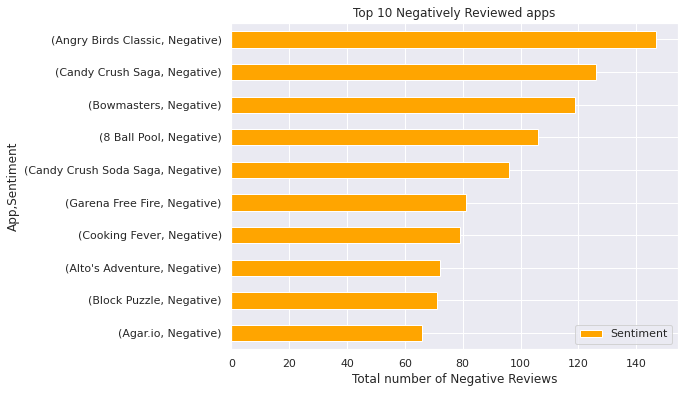

In [ ]:
# Checking for highest number of Negative Revies among all APP
Neg_data = UR_df_negative.groupby('App')['Sentiment'].value_counts().nlargest(10)

Neg_data.plot.barh(figsize = (8,6), color = 'orange').invert_yaxis()
plt.title("Top 10 Negatively Reviewed apps")
plt.xlabel('Total number of Negative Reviews')
plt.legend()

##### 1. Why did you pick this specific chart?

To Plot the Top Negatively Reviewed Apps.

##### 2. What is/are the insight(s) found from the chart?

Based on the number of Negative  Revies, Angry Birds has the maximum number of negative reviews.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There is a definitive trend for Negative Reviews. Users share their opinion based on real world feedback

#### Chart - 26 - Top Neutrally Reviewd Apps

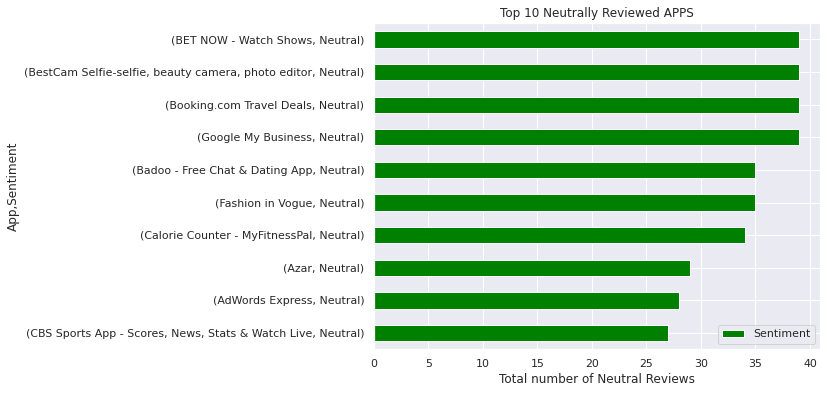

In [ ]:
# Checking for highest number of Neutral Revies among all APP
Neu_data = UR_df_neutral.groupby('App')['Sentiment'].value_counts().nlargest(10)

Neu_data.plot.barh(figsize = (8,6), color = 'green').invert_yaxis()
plt.title("Top 10 Neutrally Reviewed APPS")
plt.xlabel('Total number of Neutral Reviews')
plt.legend()

##### 1. Why did you pick this specific chart?

To Plot the Top Neutrally Reviewed Apps.

##### 2. What is/are the insight(s) found from the chart?

Based on the number of Neutral Revies, 4 APPS have got the maximum number of Neutral Reviews.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From the Above 3 observations we can conclude that users are able to decide clearly on the extreme ends of sentiments but in case of neutral sentiments, there is no definitive answer but a collective opinion does exist.

#### Chart - 27 - Distribution of Subjectivity

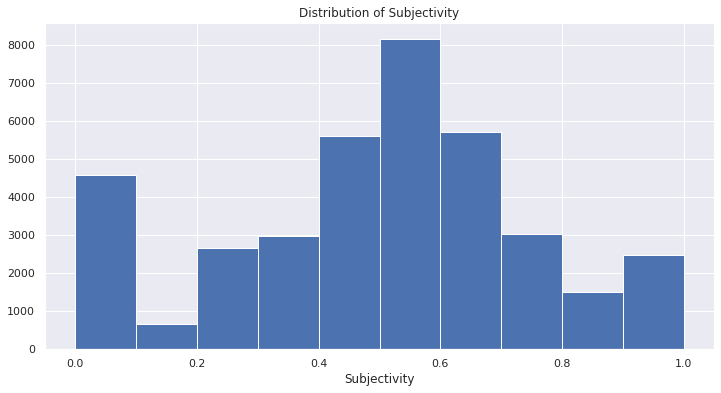

In [ ]:
# Distribution of Subjectivity
plt.figure(figsize=(12,6))
plt.xlabel("Subjectivity")
plt.title("Distribution of Subjectivity")
plt.hist(User_Review_df[User_Review_df['Sentiment_Subjectivity'].notnull()]['Sentiment_Subjectivity'])
plt.show()

##### 1. Why did you pick this specific chart?

To see the distribution of subjectivity in the data set.

##### 2. What is/are the insight(s) found from the chart?

As from the above representation of Subjectivity Distribution, we can conclude that: 
- Most reviews are of a balanced opinion between Personal Opinion and Factual Information. 
- There is a greater inclination towards Factual Information compared to Personal Opinion
- The Revies are not biased to any spectrum and are conclusively balanced.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 28 - Scatterplot for Subjectivity vs Polarity

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


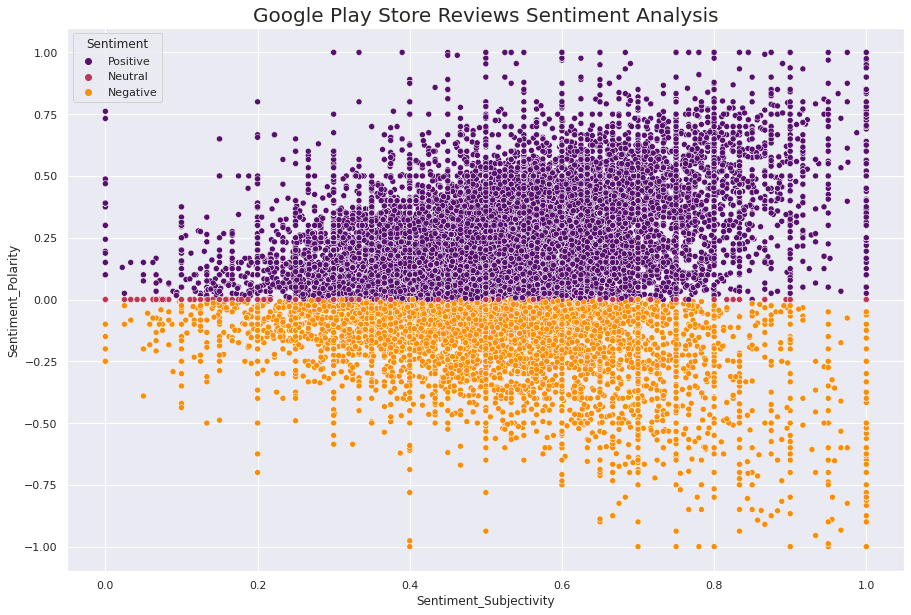

In [ ]:
# Scatterplot of sentiment polarity and sentiment subjectivity
plt.figure(figsize=(15, 10))
sns.scatterplot(User_Review_df['Sentiment_Subjectivity'], User_Review_df['Sentiment_Polarity'],
                hue = User_Review_df['Sentiment'], edgecolor='white', palette="inferno")
plt.title("Google Play Store Reviews Sentiment Analysis", fontsize=20)
plt.show()

##### 1. Why did you pick this specific chart?

Sentiment Polarity vs Sentiment Subjectvity Plot

##### 2. What is/are the insight(s) found from the chart?

- According to the above representation we can conclude that Polarity and Subjectivity are not proportional.
- Majortiy of reviews irrespective of polarity are skewed towards higher levels of subjectivity. i.e. People in general tend to provide a review based on their opinion and not solely on facts.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 29 - Stack Plot for Sentiment Polarity by Category

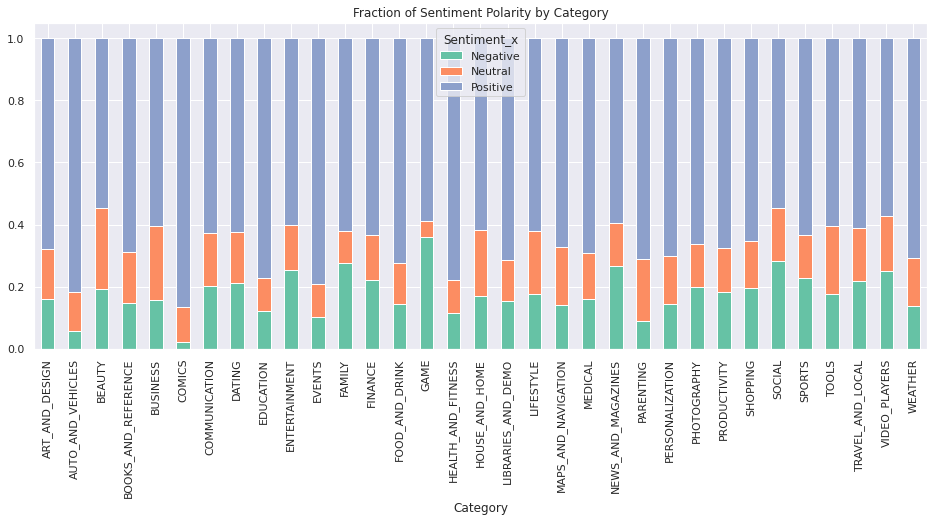

In [ ]:
new_df_stack = new_df.pivot(index='Category', columns='Sentiment_x', values='normalized_sentiment_counts')
from pylab import rcParams
rcParams['figure.figsize'] = 16, 6
sns.set(palette="Set2")
new_df_stack.plot(kind='bar', stacked = True)
plt.title("Fraction of Sentiment Polarity by Category")
plt.savefig("sentiment_dist.svg", format='svg', dpi=1200)

##### 1. Why did you pick this specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 30 - Box Plot for Sentiment Polarity between Free and Paid Apps

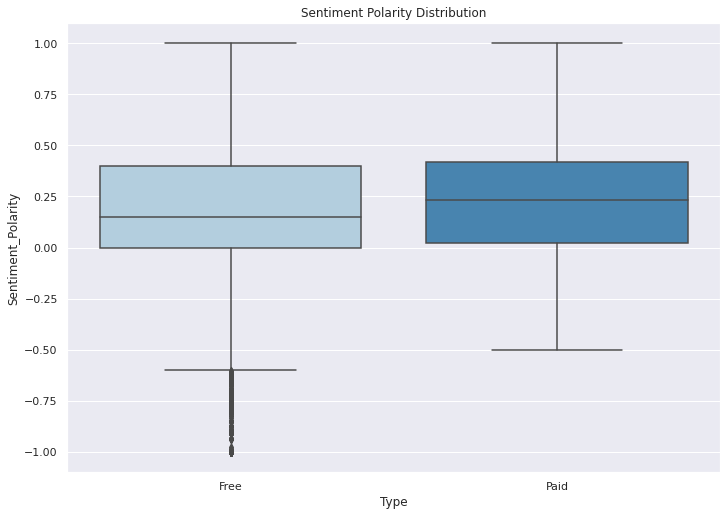

In [ ]:
## sentiment polarity and free/paid apps
#sns.set_style('ticks')
sns.set_style("darkgrid")
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.boxplot(x='Type', y='Sentiment_Polarity', data=merged_df, palette='Blues')
title = ax.set_title('Sentiment Polarity Distribution')

##### 1. Why did you pick this specific chart?

To see the variation in sentiment polarity between Free and Paid Apps.

##### 2. What is/are the insight(s) found from the chart?

* Sentiment Polarity in case of Paid Apps shows a bias when compared to Free Apps.
* In the Free Apps, there are outliers yet none for Paid Apps.
* The Mwdian for Free Apps is also lower than that for Paid Apps.
* In conclusion, consumers have a general belief that Paid Apps provide more value in comparison to Free Apps where users freely critisize.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

Answer Here.

# **Conclusion**

* Percentage of free apps = ~92%
* Percentage of apps with no age restrictions = ~82%
* Most competitive category: Family
* Category with the highest average app installs: Game
* Percentage of apps that are top rated = ~80%
* Family, Game and Tools are top three categories having 1906, 926 and 829 app count.
* Tools, Entertainment, Education, Buisness and Medical are top Genres.
* 8783 Apps are having size less than 50 MB. 7749 Apps are having rating more than 4.0 including both type of apps.
* There are 20 free apps that have been installed over a billion times.
* Minecraft is the only app in the paid category with over 10M installs. This app has also produced the most revenue only from the installation fee.
* Category in which the paid apps have the highest average installation fee: Finance
* The median size of all apps in the play store is 12 MB.
* The apps whose size varies with device has the highest number average app installs.
* The apps whose size is greater than 90 MB has the highest number of average user reviews, ie, they are more popular than the rest.
* Helix Jump has the highest number of positive reviews and Angry Birds Classic has the highest number of negative reviews.
* Overall sentiment count of merged dataset in which Positive sentiment count is 64%, Negative 22% and Neutral 13%.

## Feature Based Observations:
1.Rating

* Most of the apps have rating in between 4 and 5.
* Most numbers of apps are rated at 4.3
* Categories of apps have more than 4 average rating.item

2.Size

* Maximum number of applications present in the dataset are of small size.

3.Installs

* Majority of the apps come into these three categories, Family, Game, and Tools.
* Maximum number of apps present in google play store come under Family, Game and tools but as per the installation and requirement in the market plot, scenario is not the same. Maximum installed apps comes under Game, Communication, Productivity and Social.
* Subway Surfers, Facebook, Messenger and Google Drive are the most installed apps.

4.Type(Free/Paid)

* About 92% apps are free and 8% apps are of paid type.
* The category ‘Family’ has the highest number of paid apps.
* Free apps are installed more than paid apps.
* The app “I’m Rich — Trump Edition” from the category ‘Lifestyle’ is the most costly app priced at $400

5.Reviews

* Number of installs is positively correlated with reviews with correlation 0.64. Sentiment Analysis

6.Sentiment

* Most of the reviews are of Positive Sentiment, while Negative and Neutral have low number of reviews.

7.Sentiment Polarity / Sentiment Subjectivity

* Collection of reviews shows a wide range of subjectivity and most of the reviews fall in [-0.50,0.75] polarity scale implying that the extremely negative or positive sentiments are significantly low. Most of the reviews show a mid-range of negative and positive sentiments.
* Sentiment subjectivity is not always proportional to sentiment polarity but in maximum number of case, shows a proportional behavior, when variance is too high or low.
* Sentiment Polarity is not highly correlated with Sentiment Subjectivity.

#  Challenges & Future Work
1. Our major challenge was data cleaning.
2. 13.60% of reviews were NaN values, and even after merging both the dataframes, we could not infer much in order to fill them. Thus we had to drop them.
3. The merged data frame of both play store and user reviews, had only 816 common apps. This is just 10% of the cleaned data, we could have given more valuable analysis, if we had atleast 70% - 80% of the data available in the merged dataframes.
4. User Reviews had 42% of NaN values, which could have been used for developing an understanding of the category wise sentiments, which would help us to fill 13.60% NaN values of the Reviews column.
5. There is so much more which can be explored. Like we have current version, android version available which can be explored in detail and we can come out with more analysis where we can tell how does these things effect and needs to be kept in mind while developing app for the users.
6. We can explore the correlation between the size of the app and the version of Android on the number of installs.


### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***